In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# df_01 = pd.read_excel('N = 500 seed = 10 dt = 0.1 230720 ver3.xlsm',index_col=[0,1])
df_01 = pd.read_excel('N = 500 Q_Normal seed = 10 dt = 0.1 230821 ver3.xlsm',index_col=[0,1])
# df_sec = pd.read_excel('ver3 Order parameter and secondary cluster.xlsm',index_col=[0,1])
# df_sec = pd.read_excel('Order parameter and secondary cluster.xlsm',index_col=[0,1])
df_sec_w = pd.read_excel('Order parameter and secondary cluster with rsecd.xlsm',index_col=[0,1])
df_sec_wo = pd.read_excel('Order parameter and secondary cluster wo rsecd.xlsm',index_col=[0,1])
# df_01 = pd.read_excel('TLO/N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])

re_df = df_01.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()

In [44]:
Ks

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [72]:
df = df_01.copy()
S = df['c0'].unstack().to_numpy()
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']

df_new = df.copy()
re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()
for m in ms:
    for K in Ks:
        temp_o = df.loc[(K,m)][c_o].dropna().to_numpy(dtype = float)
        temp_s = df.loc[(K,m)][c_s].dropna().to_numpy(dtype = float)
        o10 = temp_o[temp_s>10]
        s10 = temp_s[temp_s>10]
        num_p = 0
        num_m = 0
        if len(o10) != 0:
            if abs(o10[0])<0.5:
                df_new.loc[(K,m),'main_s'] = s10[0]
                df_new.loc[(K,m),'main_o'] = o10[0]
                o_c10 = o10[1:]
                s_c10 = s10[1:]
            else:
                o_c10 = o10[:]
                s_c10 = s10[:]
            if len(o_c10) != 0:            
                argsort = np.argsort(s_c10)[::-1]
                for i,tempo in enumerate(o_c10[argsort]):
                    if abs(tempo)<2.5:
                        if tempo > 0:
                            df_new.loc[(K,m),f'p_s_{num_p}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'p_o_{num_p}'] = o_c10[argsort[i]]
                            num_p +=1
                        else:
                            df_new.loc[(K,m),f'm_s_{num_m}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'm_o_{num_m}'] = o_c10[argsort[i]]
                            num_m +=1

        # if abs(temp_o[argmain]) <0.5:
        #     df_new.loc[(K,m),'main_s'] = temp_s[argmain]
        #     df_new.loc[(K,m),'main_o'] = temp_o[argmain]


        # else: prinT()

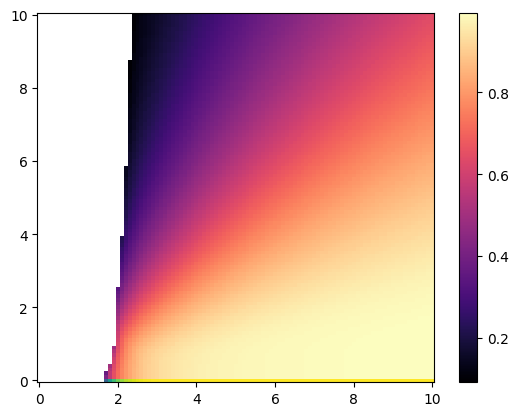

In [66]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T)
KK = df_sec.index.to_frame().K.unstack().to_numpy().T
MM = df_sec.index.to_frame().m.unstack().to_numpy().T
plt.pcolormesh(KK,MM,df_sec['r_mean_u'].unstack().to_numpy().T,cmap='magma')

plt.colorbar()
# plt.xlim(1,3)

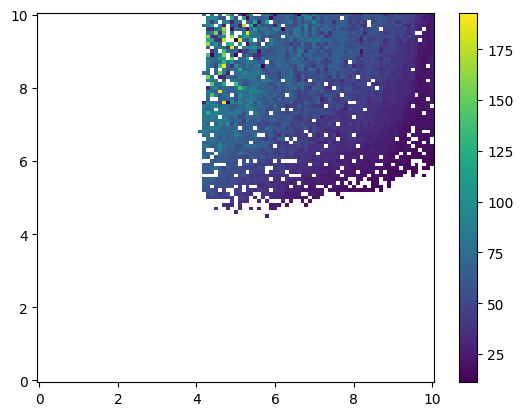

In [67]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df_new['m_s_0'].unstack().to_numpy().T)
plt.colorbar()

In [68]:
plt.cm.cmaps_listed

{'magma': <matplotlib.colors.ListedColormap at 0x11fc094d0>,
 'inferno': <matplotlib.colors.ListedColormap at 0x10d14efd0>,
 'plasma': <matplotlib.colors.ListedColormap at 0x11fac53d0>,
 'viridis': <matplotlib.colors.ListedColormap at 0x11fac7010>,
 'cividis': <matplotlib.colors.ListedColormap at 0x11fc09510>,
 'twilight': <matplotlib.colors.ListedColormap at 0x11fc09590>,
 'twilight_shifted': <matplotlib.colors.ListedColormap at 0x11fc095d0>,
 'turbo': <matplotlib.colors.ListedColormap at 0x11fc09610>}

In [69]:
plt.set_theme

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_theme'

NameError: name 'to_draw' is not defined

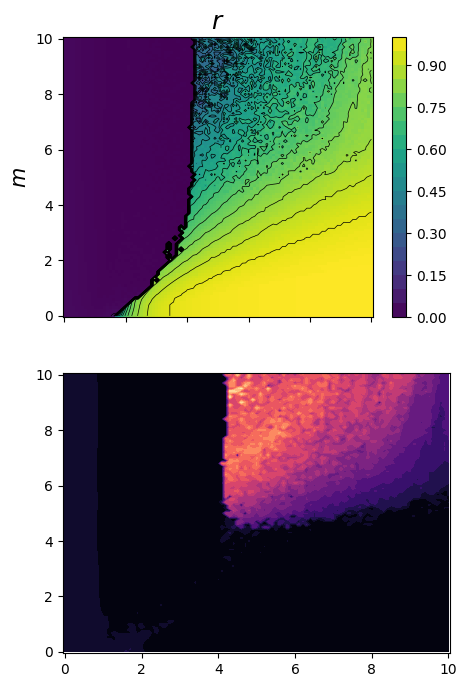

In [ ]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axr,axrstd)= plt.subplots(2,1,sharex=True,sharey=True,dpi=100,figsize=(5,8))

plt.sca(axr)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
To_show = df_new.unstack()['r'].to_numpy().T
CS = plt.contourf(KK,MM,To_show, 20, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='black',linewidths = 0.5, origin=origin)
plt.pcolormesh(KK,MM,To_show)
plt.colorbar(CS)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r$',fontsize=18)

plt.sca(axrstd)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
CS = plt.contourf(KK,MM,df_new['rstd'].unstack().to_numpy().T,20,cmap='magma')
CS = plt.contourf(KK,MM,to_draw, lev, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.hexbin(KK,MM,df_new['rstd'].unstack().to_numpy().T,cmap='magma',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$r(t)$ std.',fontsize=18)
plt.colorbar(CS)

# plt.xlabel(r'$K$',fontsize=15)


plt.tight_layout()


In [ ]:
import matplotlib.colors as colors

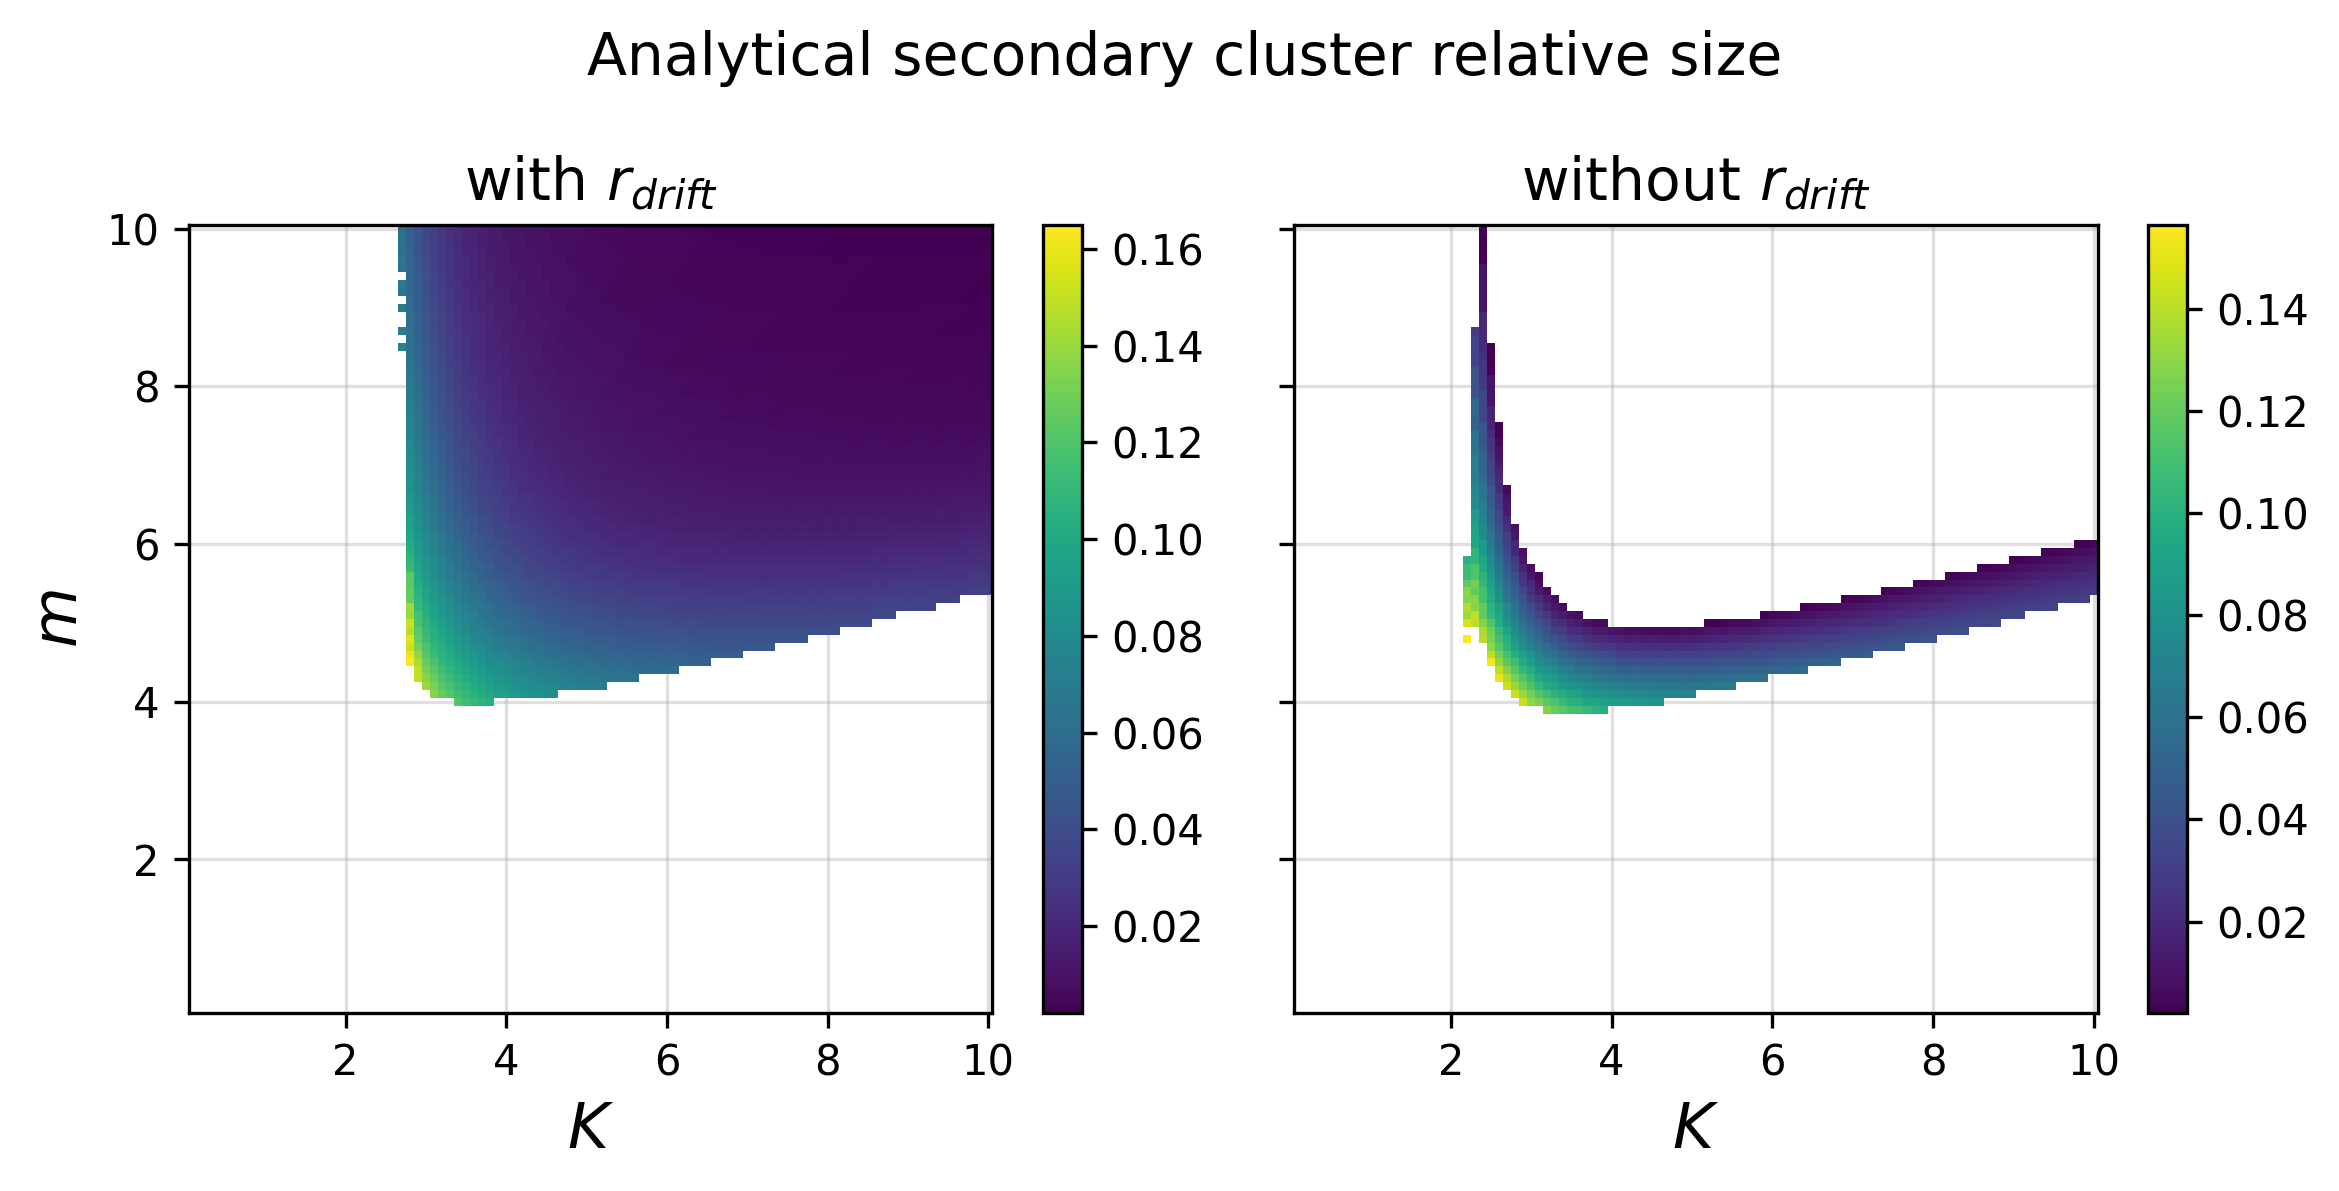

In [100]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axr,axmain)= plt.subplots(1,2,sharex=True,sharey=True,dpi=300,figsize=(8,4))

plt.sca(axr)
KK2 = df_sec_w.index.to_frame().K.unstack().to_numpy().T
MM2 = df_sec_w.index.to_frame().m.unstack().to_numpy().T
m_= df_sec_w['r_sec_d'].apply(lambda x: np.where(x>=0.002,x,np.nan)).unstack().to_numpy(float).T
# CS = plt.contourf(KK,MM,sum_,20,cmap='viridis',alpha=0)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
CS= plt.pcolormesh(KK2,MM2,m_,cmap='viridis',alpha=1,zorder=2)
plt.colorbar()
plt.title(r'with $r_{drift}$',fontsize=14)
plt.ylabel(r'$m$',fontsize=15)
plt.xlabel(r'$K$',fontsize=15)


plt.sca(axmain)
KK2 = df_sec_wo.index.to_frame().K.unstack().to_numpy().T
MM2 = df_sec_wo.index.to_frame().m.unstack().to_numpy().T
m_= df_sec_wo['r_sec_d'].apply(lambda x: np.where(x>=0.002,x,np.nan)).unstack().to_numpy(float).T
# CS = plt.contourf(KK,MM,sum_,20,cmap='viridis',alpha=0)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
CS= plt.pcolormesh(KK2,MM2,m_,cmap='viridis',alpha=1,zorder=2)
plt.colorbar()
plt.title(r'without $r_{drift}$',fontsize=14)

plt.xlabel(r'$K$',fontsize=15)

# plt.xlabel(r'$K$',fontsize=15)
# plt.ylabel(r'$m$',fontsize=15)
plt.suptitle(r'Analytical secondary cluster relative size',fontsize=14)
plt.tight_layout()

# plt.savefig('2n1 relative Q_Normal.png',dpi=400,transparent=True)


In [ ]:
N =500

NameError: name 'N' is not defined

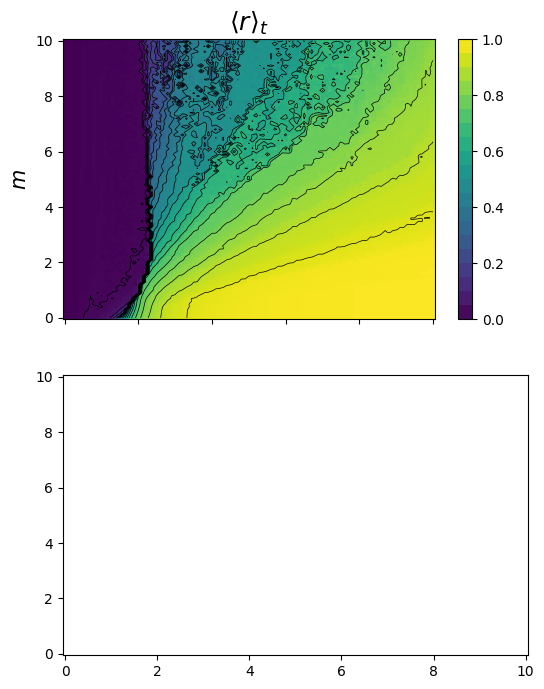

In [52]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
origin = 'lower'
fig,(axr,axmain)= plt.subplots(2,1,sharex=True,sharey=True,dpi=100,figsize=(6,8))

plt.sca(axr)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
To_show = df_new.unstack()['r'].to_numpy().T
CS = plt.contourf(KK,MM,To_show, 20, origin=origin,vmax=1,vmin=0)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='black',linewidths = 0.5, origin=origin)
CS_ = plt.pcolormesh(KK,MM,To_show,vmax=1)
cbar_ = plt.colorbar(CS)
cbar_.set_ticks([0.0,0.20,0.40,0.60,0.80,1.00])
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$\langle$$r$$\rangle$$_t$',fontsize=18)

plt.sca(axmain)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
Z =df_new['main_s'].unstack().to_numpy().T/N
norm = colors.Normalize(vmin=np.nanmin(Z),vmax=np.nanmax(Z))
CS = plt.contourf(KK,MM,Z,20,norm=norm,cmap='viridis')
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS_ = plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T/500,cmap='viridis',alpha=1)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title('main cluster relative size',fontsize=18)
cbar = plt.colorbar(CS_)
cbar.set_ticks([0,0.2,0.4,0.6,0.8,1.0])
for i in CS.levels[::]:
    cbar.ax.axhline(i,0,1,color ='k',alpha=1,lw=0.3)

# plt.xlabel(r'$K$',fontsize=15)


plt.tight_layout()
# plt.savefig('2n1 relative Q_Normal.png',dpi=400,transparent=True)


In [ ]:
np.nanmin(df_new['main_s'].unstack().to_numpy().T)

161.0

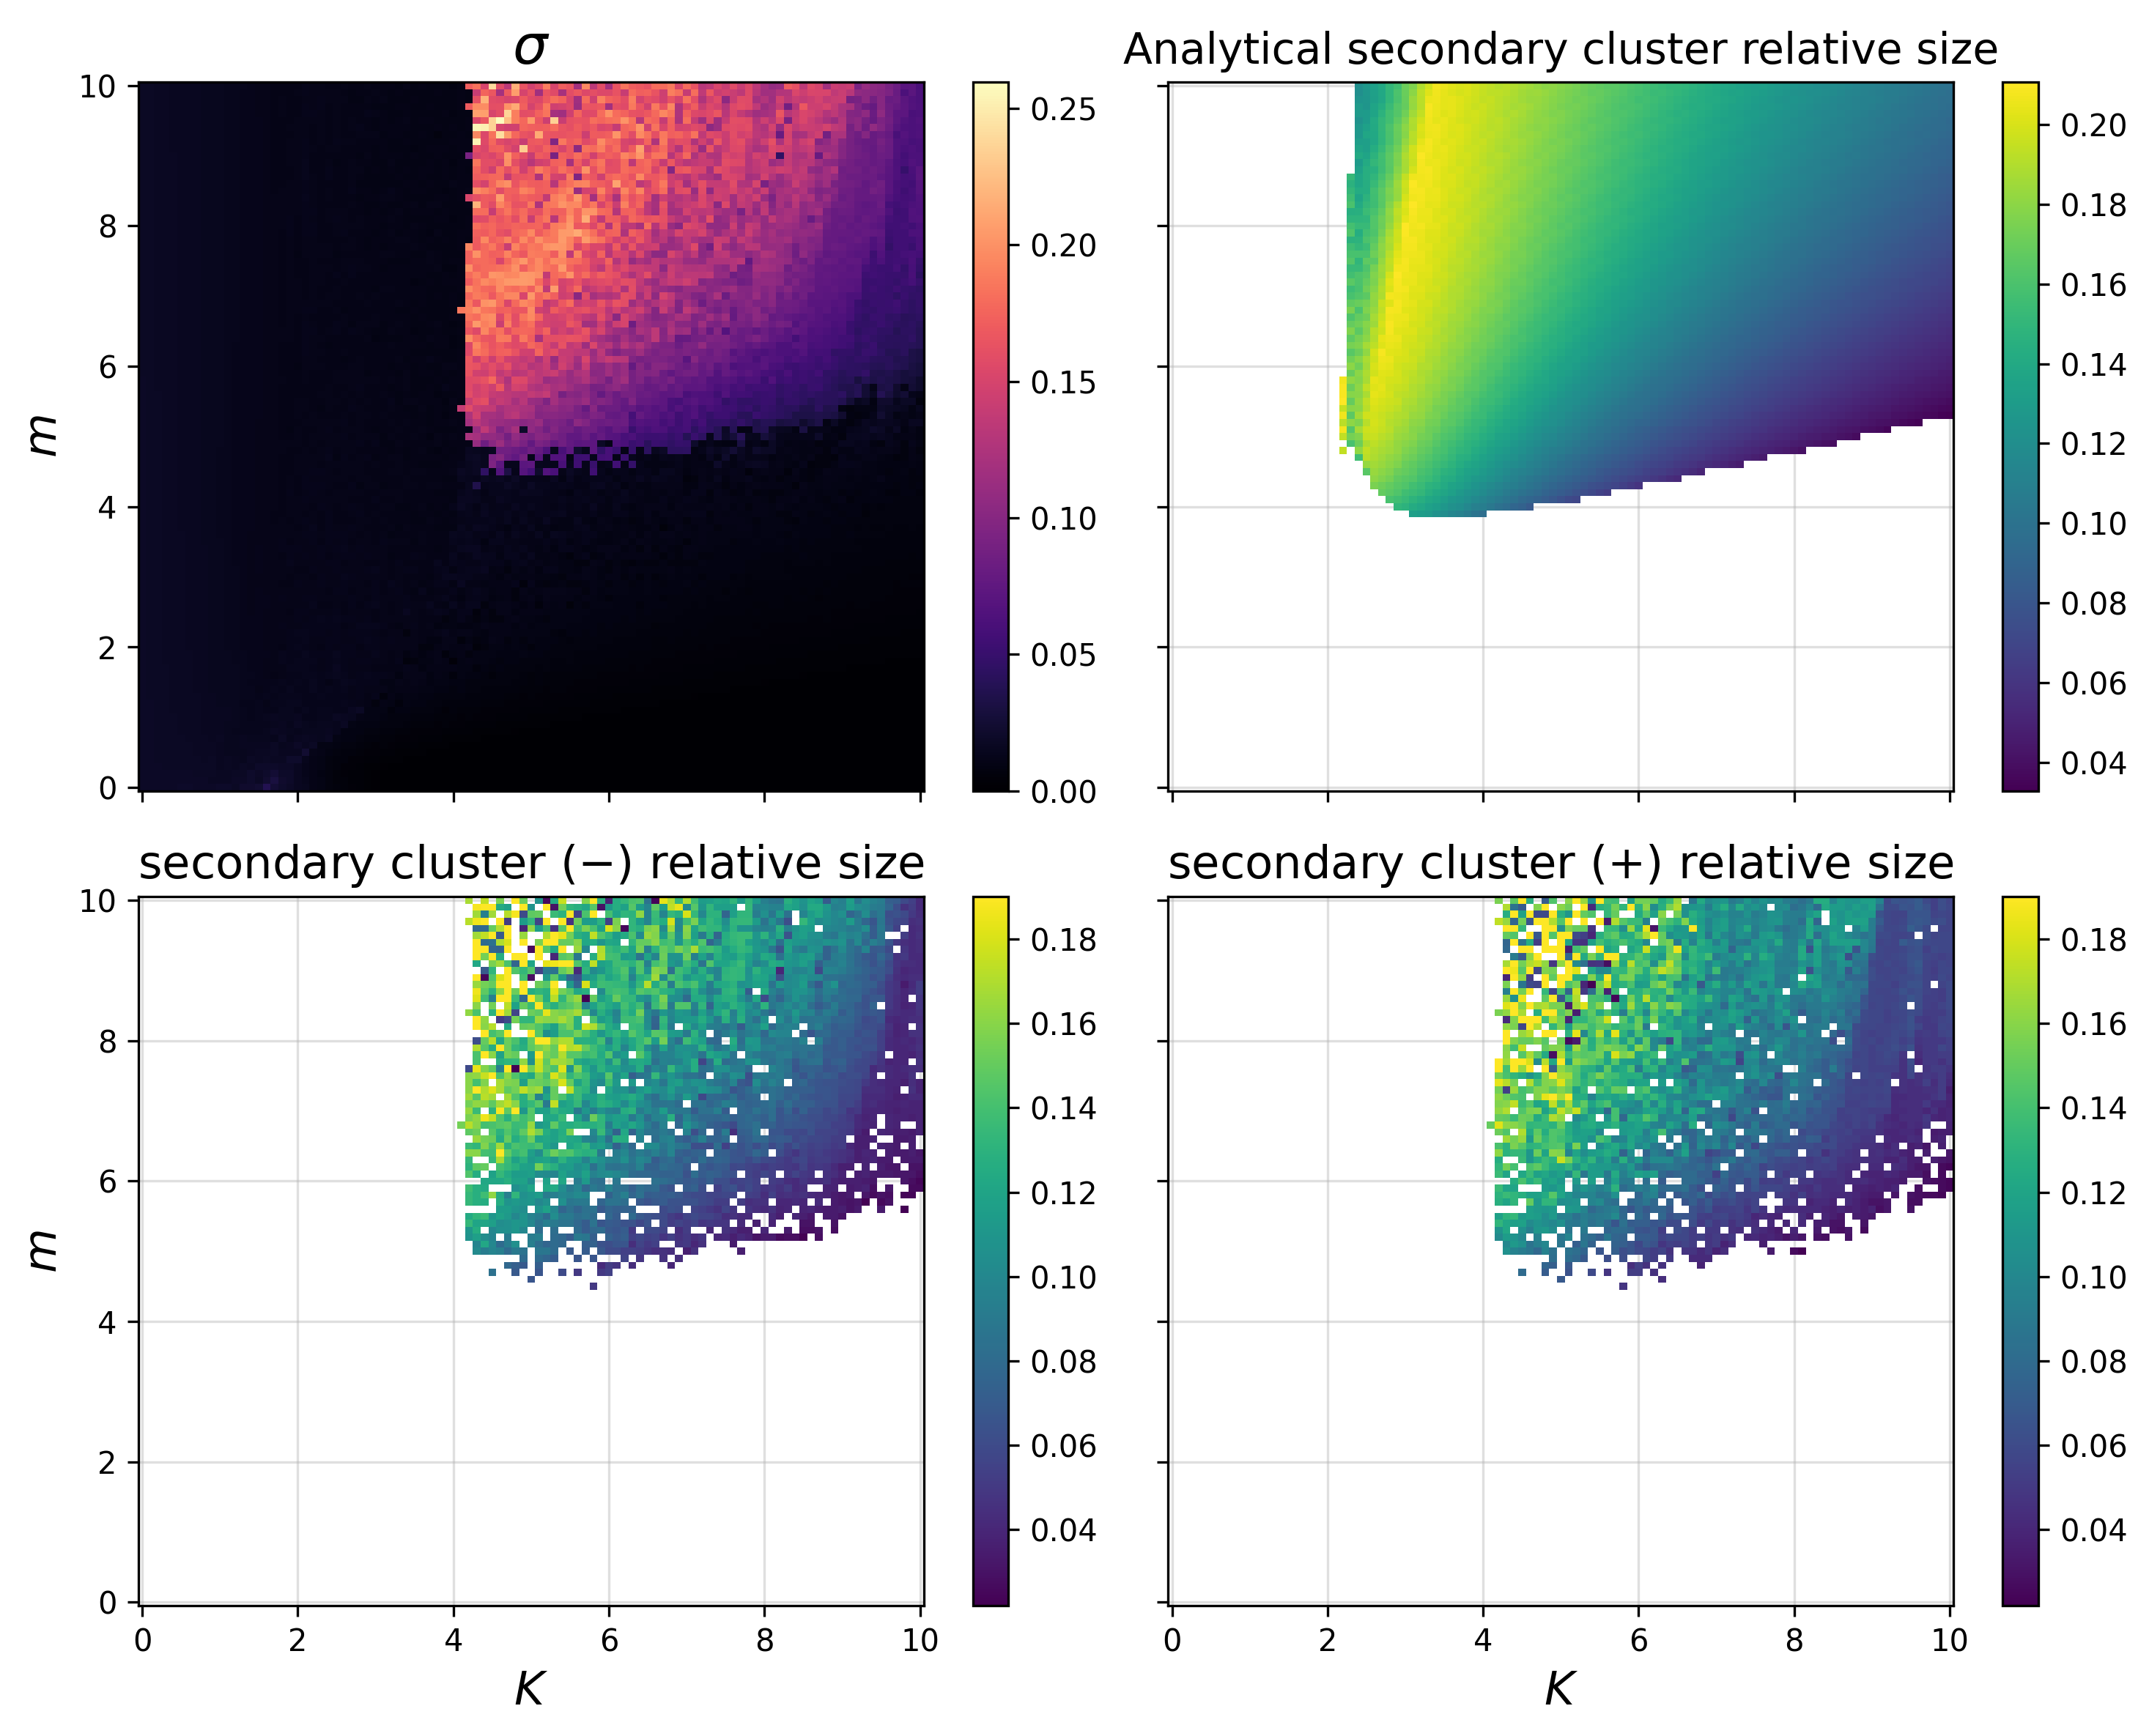

In [70]:
origin = 'lower'
fig,((axrstd,ax2nd),(ax2ndm,ax2ndp))= plt.subplots(2,2,sharex=True,sharey=True,dpi=300,figsize=(10,8))

plt.sca(axrstd)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
# CS = plt.contourf(KK,MM,df_new['rstd'].unstack().to_numpy().T,20,cmap='magma')

# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,df_new['rstd'].unstack().to_numpy().T,cmap='magma',alpha=1)
# plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$\sigma$',fontsize=18)
plt.colorbar(CS)

plt.sca(ax2ndp)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
P_= df_new['p_s_0'].unstack().to_numpy().T/500
# CS = plt.contourf(KK,MM,P_,20,cmap='magma')
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,P_,cmap='viridis',alpha=1,vmax=0.19)
plt.xlabel(r'$K$',fontsize=15)
plt.gca().set_axisbelow(True)

plt.grid(zorder=0,alpha=0.4)
plt.title(r'secondary cluster $(+)$ relative size',fontsize=15)
plt.colorbar(CS)


plt.sca(ax2ndm)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
M_= df_new['m_s_0'].unstack().to_numpy().T/500
# CS = plt.contourf(KK,MM,M_,20,cmap='viridis')
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,M_,cmap='viridis',alpha=1,vmax=0.19)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
plt.title(r'secondary cluster $(-)$ relative size',fontsize=15)
plt.colorbar(CS)#.set_ticks([0.05,0.10,0.15,0.20])


sum_ = np.nansum(np.dstack((P_,M_)),2)
sum_ = np.where(sum_==0,np.nan,sum_)
plt.sca(ax2nd)

KK2 = df_sec.index.to_frame().K.unstack().to_numpy().T
MM2 = df_sec.index.to_frame().m.unstack().to_numpy().T
m_= df_sec['r_sec_u'].apply(lambda x: np.where(x>=0.002,x,np.nan)).unstack().to_numpy(float).T
# CS = plt.contourf(KK,MM,sum_,20,cmap='viridis',alpha=0)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
CS= plt.pcolormesh(KK2,MM2,m_,cmap='viridis',alpha=1,zorder=2)
# CS = plt.pcolormesh(KK,MM,M_,cmap='viridis',alpha=1,vmax=0.19)

# plt.axvline(4)
# plt.xlabel(r'$K$',fontsize=15)
# plt.ylabel(r'$m$',fontsize=15)
plt.title(r'Analytical secondary cluster relative size',fontsize=14)
plt.colorbar(CS)

# ax.axis('off')
# plt.gca().axis('off')
plt.tight_layout()
# plt.savefig('2n2 2 relative Q_Normal.png',dpi=400,transparent=True)

In [17]:
df_sec['r_sec_u'].dropna().to_clipboard()

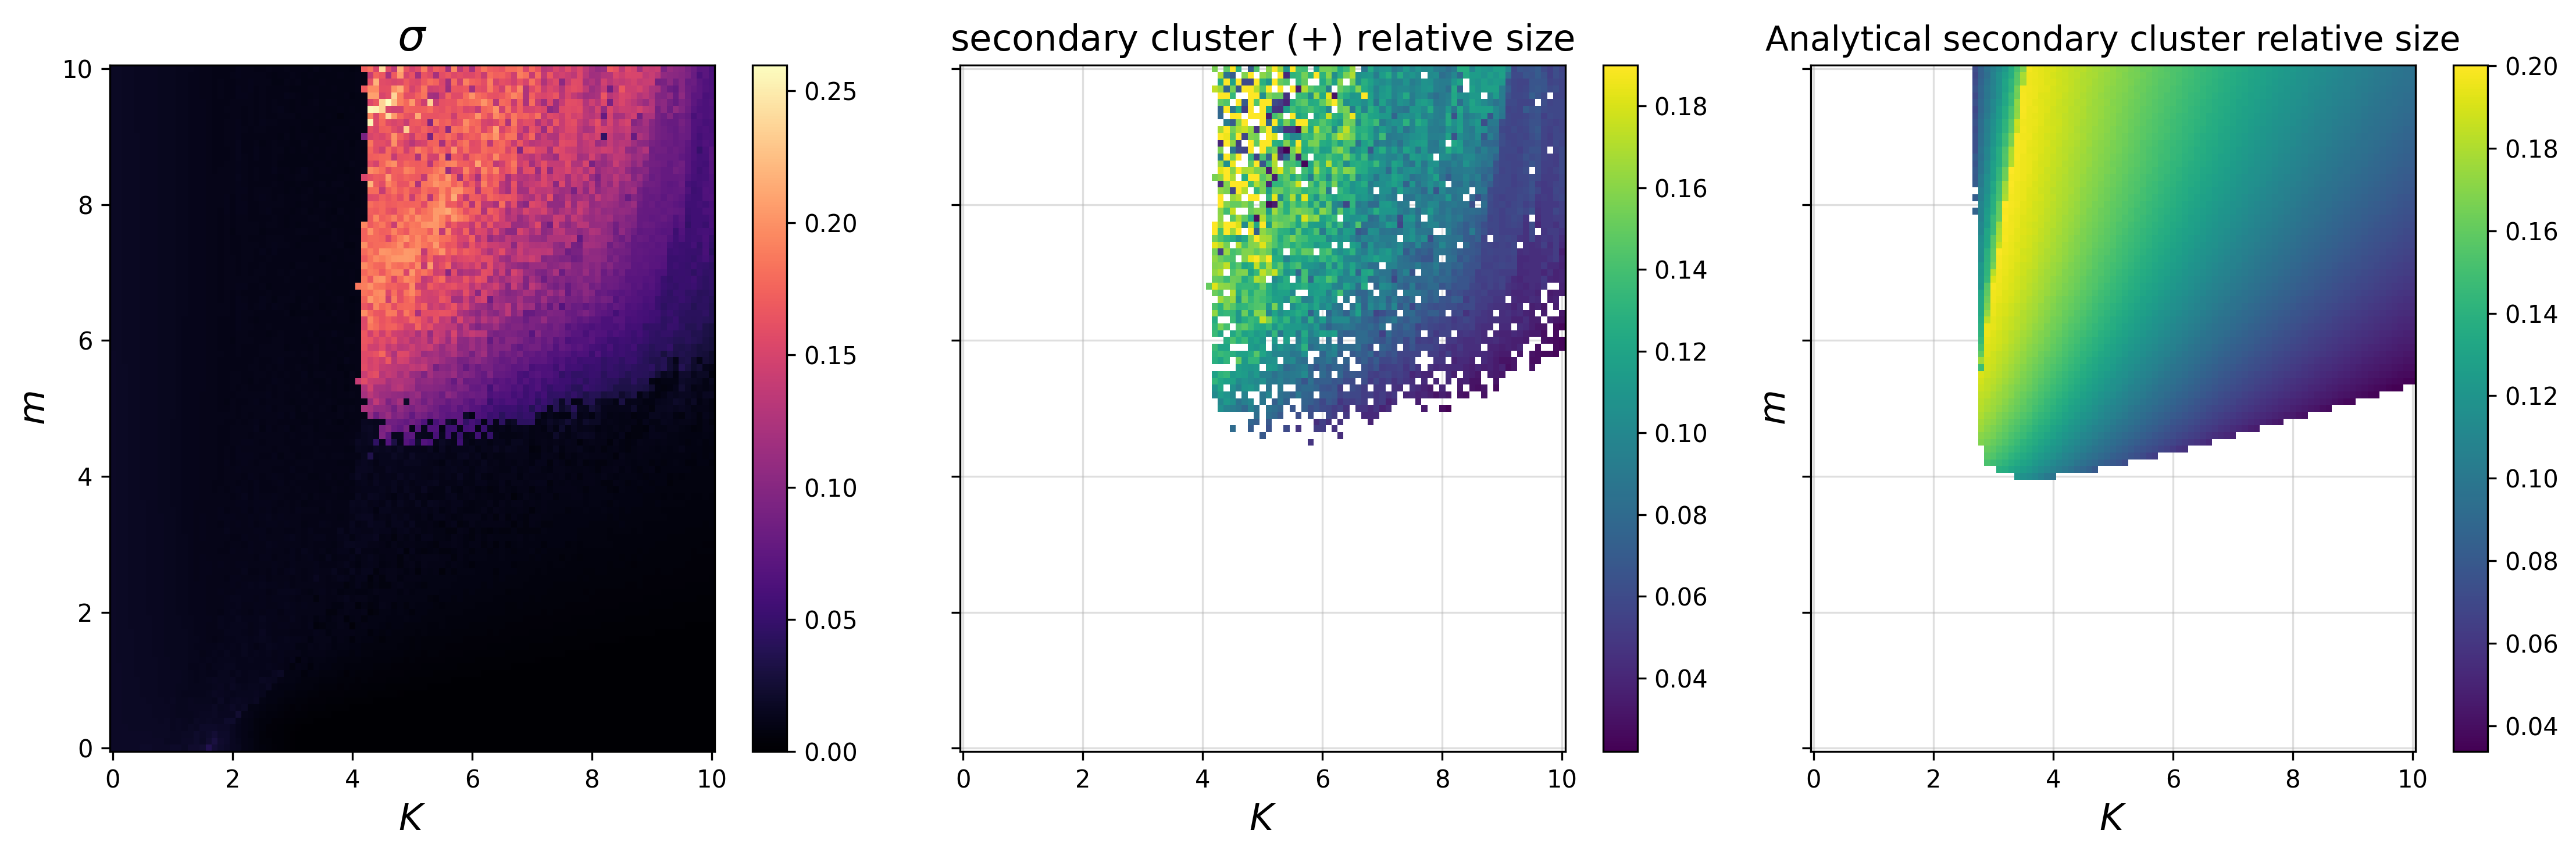

In [42]:
origin = 'lower'
fig,((axrstd,ax2ndp,ax2nd))= plt.subplots(1,3,sharex=True,sharey=True,dpi=300,figsize=(15,5))

plt.sca(axrstd)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)

plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)

# CS = plt.contourf(KK,MM,df_new['rstd'].unstack().to_numpy().T,20,cmap='magma')

# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,df_new['rstd'].unstack().to_numpy().T,cmap='magma',alpha=1)
# plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.title(r'$\sigma$',fontsize=18)
plt.colorbar(CS)

plt.sca(ax2ndp)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
P_= df_new['p_s_0'].unstack().to_numpy().T/500
# CS = plt.contourf(KK,MM,P_,20,cmap='magma')
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS = plt.pcolormesh(KK,MM,P_,cmap='viridis',alpha=1,vmax=0.19)
plt.xlabel(r'$K$',fontsize=15)
plt.gca().set_axisbelow(True)

plt.grid(zorder=0,alpha=0.4)
plt.title(r'secondary cluster $(+)$ relative size',fontsize=15)
plt.colorbar(CS)

plt.sca(ax2nd)

KK2 = df_sec.index.to_frame().K.unstack().to_numpy().T
MM2 = df_sec.index.to_frame().m.unstack().to_numpy().T
m_= df_sec['r_sec_u'].apply(lambda x: np.where(x>=0.002,x,np.nan)).unstack().to_numpy(float).T
# CS = plt.contourf(KK,MM,sum_,20,cmap='viridis',alpha=0)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
# CS = plt.contourf(KK2,MM2,m_,20,cmap='viridis',alpha=0)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
CS= plt.pcolormesh(KK2,MM2,m_,cmap='viridis',alpha=1,zorder=2)
# CS = plt.pcolormesh(KK,MM,M_,cmap='viridis',alpha=1,vmax=0.19)


plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)

# plt.axvline(4)
# plt.xlabel(r'$K$',fontsize=15)
# plt.ylabel(r'$m$',fontsize=15)
plt.title(r'Analytical secondary cluster relative size',fontsize=14)
plt.colorbar(CS)

# ax.axis('off')
# plt.gca().axis('off')
plt.tight_layout()
# plt.savefig('2n2 2 relative Q_Normal.png',dpi=400,transparent=True)

In [26]:
df_sec['r_sec_u'].dropna().sort_index().to_clipboard()

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

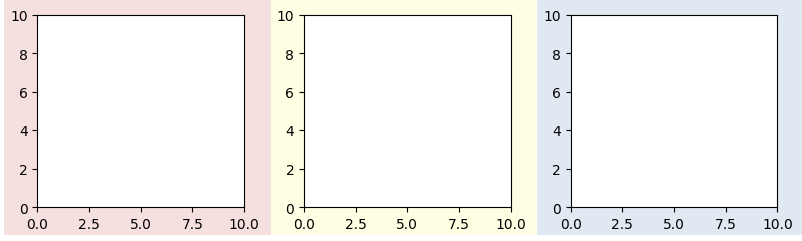

In [29]:
fig = plt.figure(figsize=(8,2.5))
subfigs = fig.subfigures(1,1)
subfigsnest = subfigs.subfigures(1,3)
axs = []
hex_c = ['#bf352a26','#fffd4726','#316ba626']

for i,(sub,c) in enumerate(zip(subfigsnest,hex_c)):
    sub.set_facecolor(c)
    ax = sub.subplots(1)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    axs.append(ax)
(ax2ndp,axmain,ax2ndm) = axs

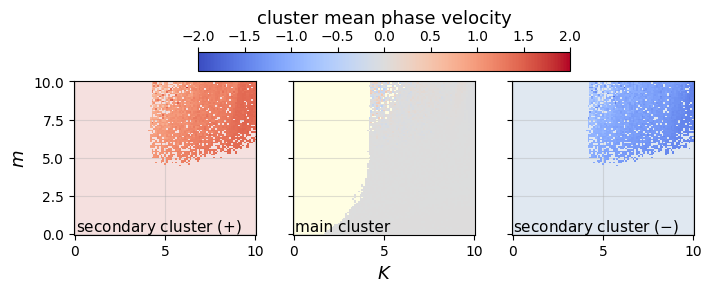

In [31]:
fig = plt.figure(figsize=(8,2.5))
subfigs = fig.subfigures(1,1)

(ax2ndp,axmain,ax2ndm) = subfigs.subplots(1,3,sharex=True,sharey=True)
hex_c = ['#bf352a26','#fffd4726','#316ba626']

for ax,color in zip((ax2ndp,axmain,ax2ndm),hex_c):
    ax.set_facecolor(color)
plt.sca(ax2ndp)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
P_= df_new['p_o_0'].unstack().to_numpy().T
CS = plt.pcolormesh(KK,MM,P_,alpha=1,cmap='coolwarm',vmax=2,vmin=-2.0)
# plt.xlabel(r'$K$',fontsize=13)
plt.ylabel(r'$m$',fontsize=13)
plt.gca().set_axisbelow(True)

plt.grid(zorder=0,alpha=0.4)
plt.text(0.05,0.15,r'secondary cluster $(+)$',fontsize=11)

# plt.colorbar(CS)


plt.sca(ax2ndm)
M_= df_new['m_o_0'].unstack().to_numpy().T
CS = plt.pcolormesh(KK,MM,M_,alpha=1,cmap='coolwarm',vmax=2,vmin=-2.0)
# plt.xlabel(r'$K$',fontsize=13)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
plt.text(0.05,0.15,r'secondary cluster $(-)$',fontsize=11)

# plt.colorbar(CS)


sum_ = np.nansum(np.dstack((P_,M_)),2)
sum_ = np.where(sum_==0,np.nan,sum_)
plt.sca(axmain)
main= df_new['main_o'].unstack().to_numpy().T

plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
CS= plt.pcolormesh(KK,MM,main,alpha=1,cmap='coolwarm',vmax=2,vmin=-2.0)
plt.xlabel(r'$K$',fontsize=13)
# plt.ylabel(r'$m$',fontsize=13)
plt.text(0.05,0.15,r'main cluster',fontsize=11)
cbar =subfigs.colorbar(CS,ax=(ax2ndp,axmain,ax2ndm),location='top',shrink=0.6)
cbar.set_label(label='cluster mean phase velocity',fontsize=13)
# plt.tight_layout()
# plt.suptitle('cluster mean angular velocity',y=0.90,fontsize=15)
# plt.tight_layout()
# plt.savefig('cluster mean phase velocity.png',dpi=400)


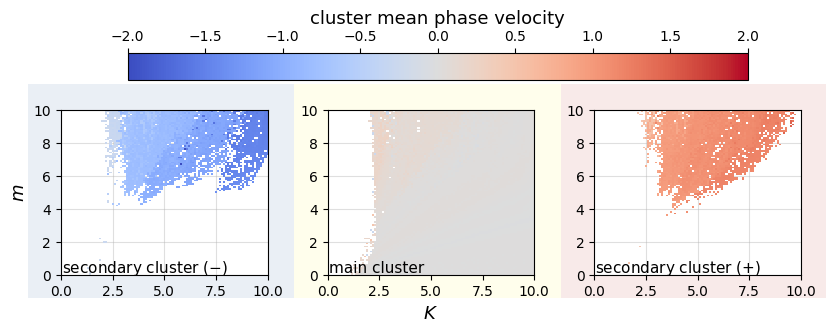

In [641]:
fig = plt.figure(figsize=(8,2.5))
colorbar,subfigs = fig.subfigures(2,1,height_ratios=[1,6])
subfigsnest = subfigs.subfigures(1,3,wspace=0.5)
axs = []
vmax=2.0
hex_c = ['#316ba61a','#fffd471a','#bf352a1a']
ax_ = colorbar.subplots(1)
for i,(sub,c) in enumerate(zip(subfigsnest,hex_c)):
    sub.set_facecolor(c)
    ax = sub.subplots(1)
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    axs.append(ax)
    # if i == 0:
    # plt.scf(sub)
    # ax.set_ylabel(r'$m$',fontsize=13)
    # ax.set_ylabel(r'$K$',fontsize=13)

        
(ax2ndp,axmain,ax2ndm) = axs
# fig, (ax2ndp,axmain,ax2ndm)= plt.subfigures(1,3,sharex=True,sharey=True,figsize=(8,2.5))
# fig, (ax2ndp,axmain,ax2ndm)= plt.subplots(1,3,sharex=True,sharey=True,figsize=(8,2.5))


plt.sca(ax2ndm)
KK = df_01.index.to_frame().K.unstack().to_numpy().T
MM = df_01.index.to_frame().m.unstack().to_numpy().T
P_= df_new['p_o_0'].unstack().to_numpy().T
CS = plt.pcolormesh(KK,MM,P_,alpha=1,cmap='coolwarm',vmax=vmax,vmin=-2.0)
# plt.xlabel(r'$K$',fontsize=13)
plt.gca().set_axisbelow(True)

plt.grid(zorder=0,alpha=0.4)
plt.text(0.05,0.15,r'secondary cluster $(+)$',fontsize=11)

# plt.colorbar(CS)


plt.sca(ax2ndp)

M_= df_new['m_o_0'].unstack().to_numpy().T
CS = plt.pcolormesh(KK,MM,M_,alpha=1,cmap='coolwarm',vmax=vmax,vmin=-2.0)
plt.ylabel(r'$m$',fontsize=13)

# plt.xlabel(r'$K$',fontsize=13)
plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
plt.text(0.05,0.15,r'secondary cluster $(-)$',fontsize=11)

# plt.colorbar(CS)


sum_ = np.nansum(np.dstack((P_,M_)),2)
sum_ = np.where(sum_==0,np.nan,sum_)
plt.sca(axmain)
main= df_new['main_o'].unstack().to_numpy().T

plt.gca().set_axisbelow(True)
plt.grid(zorder=0,alpha=0.4)
CS= plt.pcolormesh(KK,MM,main,alpha=1,cmap='coolwarm',vmax=vmax,vmin=-2.0)
plt.xlabel(r'$K$',fontsize=13)
# plt.ylabel(r'$m$',fontsize=13)
plt.text(0.05,0.15,r'main cluster',fontsize=11)
cbar =colorbar.colorbar(CS,cax=ax_,location='top',shrink=0.4)
cbar.set_label(label='cluster mean phase velocity',fontsize=13)
# plt.tight_layout()
# subfigsnest.tight_layout()
# plt.suptitle('cluster mean angular velocity',y=0.90,fontsize=15)

# plt.savefig('cluster mean phase velocity2 2.png',dpi=400,transparent=True,bbox_inches="tight")


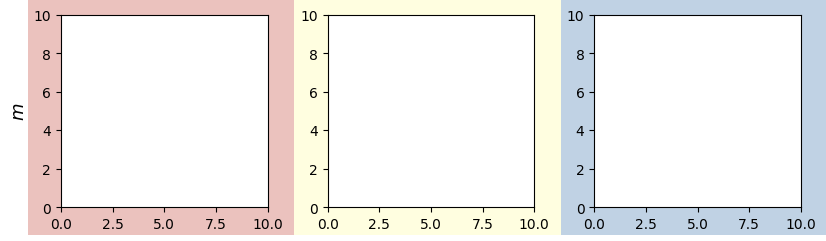

In [163]:
fig = plt.figure(figsize=(8,2.5))
subfigs = fig.subfigures(1,1)
subfigsnest = subfigs.subfigures(1,3)
axs = []
hex_c = ['#bf352a4d','#fffd472a','#316ba64d']

for i,(sub,c) in enumerate(zip(subfigsnest,hex_c)):
    ax = sub.subplots(1)

    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    # axs.append(ax)
    if i == 0:
        ax.set_ylabel(r'$m$',fontsize=13)
    sub.set_facecolor(c)

        
# (ax2ndp,axmain,ax2ndm) = axs

## Order parameter

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# df_TLO = pd.read_excel('TLO/N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])
# df_TLO = pd.read_excel('N = 500 seed = 10 dt = 0.1 230720 ver3.xlsm',index_col=[0,1])

In [714]:
df_TLO = df_01.copy()

In [715]:
K_ = df_TLO.reset_index().K.unique()
Ks = np.arange(0,10.01,0.1)
rep = {}
for k_,k in zip(K_,Ks): rep[k_] = k
df_TLO = df_TLO.reset_index().replace({'K':rep,'m':rep}).set_index(['K','m'])

In [716]:
df_TLO.reset_index().K.replace(K_,Ks).unique()

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [717]:
df = df_TLO.copy()
S = df['c0'].unstack().to_numpy()
c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']
temp = np.zeros_like(S)
temp2 = np.zeros_like(S)
temp3 = np.zeros_like(S)
df_new = df.copy()
re_df = df.reset_index()
Ks = re_df.K.unique()
ms = re_df.m.unique()
datas = []
for m in ms:
    for K in Ks:
        temp_o = df.loc[(K,m)][c_o].dropna().to_numpy()
        temp_s = df.loc[(K,m)][c_s].dropna().to_numpy()
        rstd = df.loc[(K,m)]['rstd']
        rMM = df.loc[(K,m)]['rMM']
        o10 = temp_o[temp_s>10]
        s10 = temp_s[temp_s>10]
        num_p = 0
        num_m = 0
        if len(o10) != 0:
            if abs(o10[0])<0.5:
                data = [K,m,o10[0],s10[0],'main',rstd,rMM]
                datas.append(data)
                df_new.loc[(K,m),'main_s'] = s10[0]
                df_new.loc[(K,m),'main_o'] = o10[0]
                o_c10 = o10[1:]
                s_c10 = s10[1:]
            else:
                o_c10 = o10[:]
                s_c10 = s10[:]
            if len(o_c10) != 0:            
                argsort = np.argsort(s_c10)[::-1]
                num_c_p = 0
                num_c_m = 0
                for i,tempo in enumerate(o_c10[argsort]):
                    if abs(tempo)<2.5:
                        if tempo > 0:
                            if num_c_p == 0:
                                data = [K,m,o_c10[argsort[i]],s_c10[argsort[i]],'2nd cluster(+)',rstd,rMM]
                                num_c_p+=1
                                datas.append(data)
                            df_new.loc[(K,m),f'p_s_{num_p}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'p_o_{num_p}'] = o_c10[argsort[i]]
                            num_p +=1
                        elif tempo < 0:
                            if num_c_m == 0:
                                data = [K,m,o_c10[argsort[i]],s_c10[argsort[i]],'2nd cluster(-)',rstd,rMM]
                                num_c_m+=1
                                datas.append(data)


                            df_new.loc[(K,m),f'm_s_{num_m}'] = s_c10[argsort[i]]
                            df_new.loc[(K,m),f'm_o_{num_m}'] = o_c10[argsort[i]]
                            num_m +=1

        # if abs(temp_o[argmain]) <0.5:
        #     df_new.loc[(K,m),'main_s'] = temp_s[argmain]
        #     df_new.loc[(K,m),'main_o'] = temp_o[argmain]


        # else: prinT()

In [718]:
df_data = pd.DataFrame(datas,columns=['K','m','cluster mean phase velocity','cluster size','type',r'$r$\'s temporal std','rMM'])

In [ ]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df_data,x='K',y='m',z='cluster mean phase velocity',color=r'$r$\'s temporal std',symbol = 'type',size='cluster size',size_max=15,opacity=0.7)
fig.show()
# fig.to_html()

In [143]:
plotly.offline.plot(fig, filename='Kuramoto TLO.html')

'Kuramoto TLO.html'

In [63]:
df_data.to_csv('cluster2.csv')

In [ ]:
df_data.max()

K                                  10.0
m                                  10.0
cluster mean phase velocity    1.508945
cluster size                      500.0
type                               main
$r$\'s temporal std            0.230019
dtype: object

## cluster

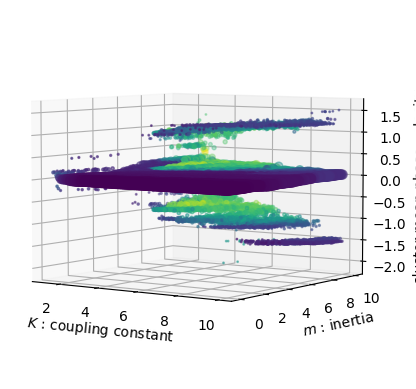

In [649]:
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv('cluster2.csv')
df = df_data.copy()
K = df['K']
m = df['m']
rstd = df[r'$r$\'s temporal std']
O = df['cluster mean phase velocity']
S = df['cluster size']
fig = plt.figure()
ax = plt.subplot(111,projection='3d')
ax.scatter(K,m,O,s=S*0.1,c=rstd)
ax.set_xlabel('$K$ : coupling constant')
ax.set_ylabel('$m$ : inertia')
ax.set_zlabel('cluster mean phase velocity')

ax.view_init(elev=5., azim=-55, roll=0)

In [605]:
print(df.K.unique())

[ 1.2  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6
  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.
  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4
  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8
  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2
  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6
  9.7  9.8  9.9 10.   1.3]


                 K            m  cluster mean phase velocity  cluster size  \
count  7990.000000  7990.000000                  7990.000000   7990.000000   
mean      6.088348     4.955257                     0.036041    398.468210   
std       2.294034     2.940773                     0.052618     95.917546   
min       1.200000     0.000000                    -0.272691     18.000000   
25%       4.100000     2.400000                     0.003385    344.000000   
50%       6.100000     5.000000                     0.023490    429.000000   
75%       8.100000     7.500000                     0.040143    473.000000   
max      10.000000    10.000000                     0.496854    500.000000   

       $r$\'s temporal std          rMM  
count          7990.000000  7990.000000  
mean              0.048035     0.178381  
std               0.055436     0.175481  
min               0.000000     0.000000  
25%               0.008430     0.046764  
50%               0.022078     0.111214  
75%

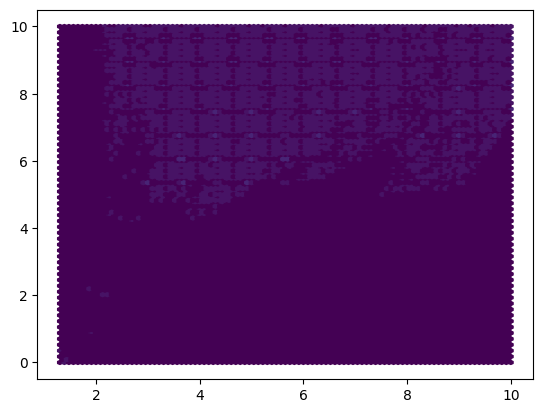

In [650]:
num = 0
for marker,type_ in zip(['s','v','^'],['main', '2nd cluster(-)', '2nd cluster(+)']):
    temp = df.query(f'type == \'{type_}\'')
    print(temp.describe())
    if num ==1:
        plt.hexbin(temp['K'],temp['m'],vmin=0,vmax=20)
    num +=1

In [651]:
df = pd.read_csv('cluster2.csv')

In [45]:
ls

230720 visualization.py
230721 poster figure.ipynb
2n1.png
2n2.png
Kuramoto TLO.html
N = 500 seed = 10 dt = 0.1 230720 ver3.xlsm
TLO/
cluster.csv
main.png
minus.png
plus.png
plus_size.png
temp.png
total.png


In [656]:
K_ = df_01.reset_index().K.unique()
Ks = np.arange(0,10.01,0.1)
rep = {}
for k_,k in zip(K_,Ks): rep[k_] = k
df_01 = df_01.reset_index().replace({'K':rep,'m':rep}).set_index(['K','m'])

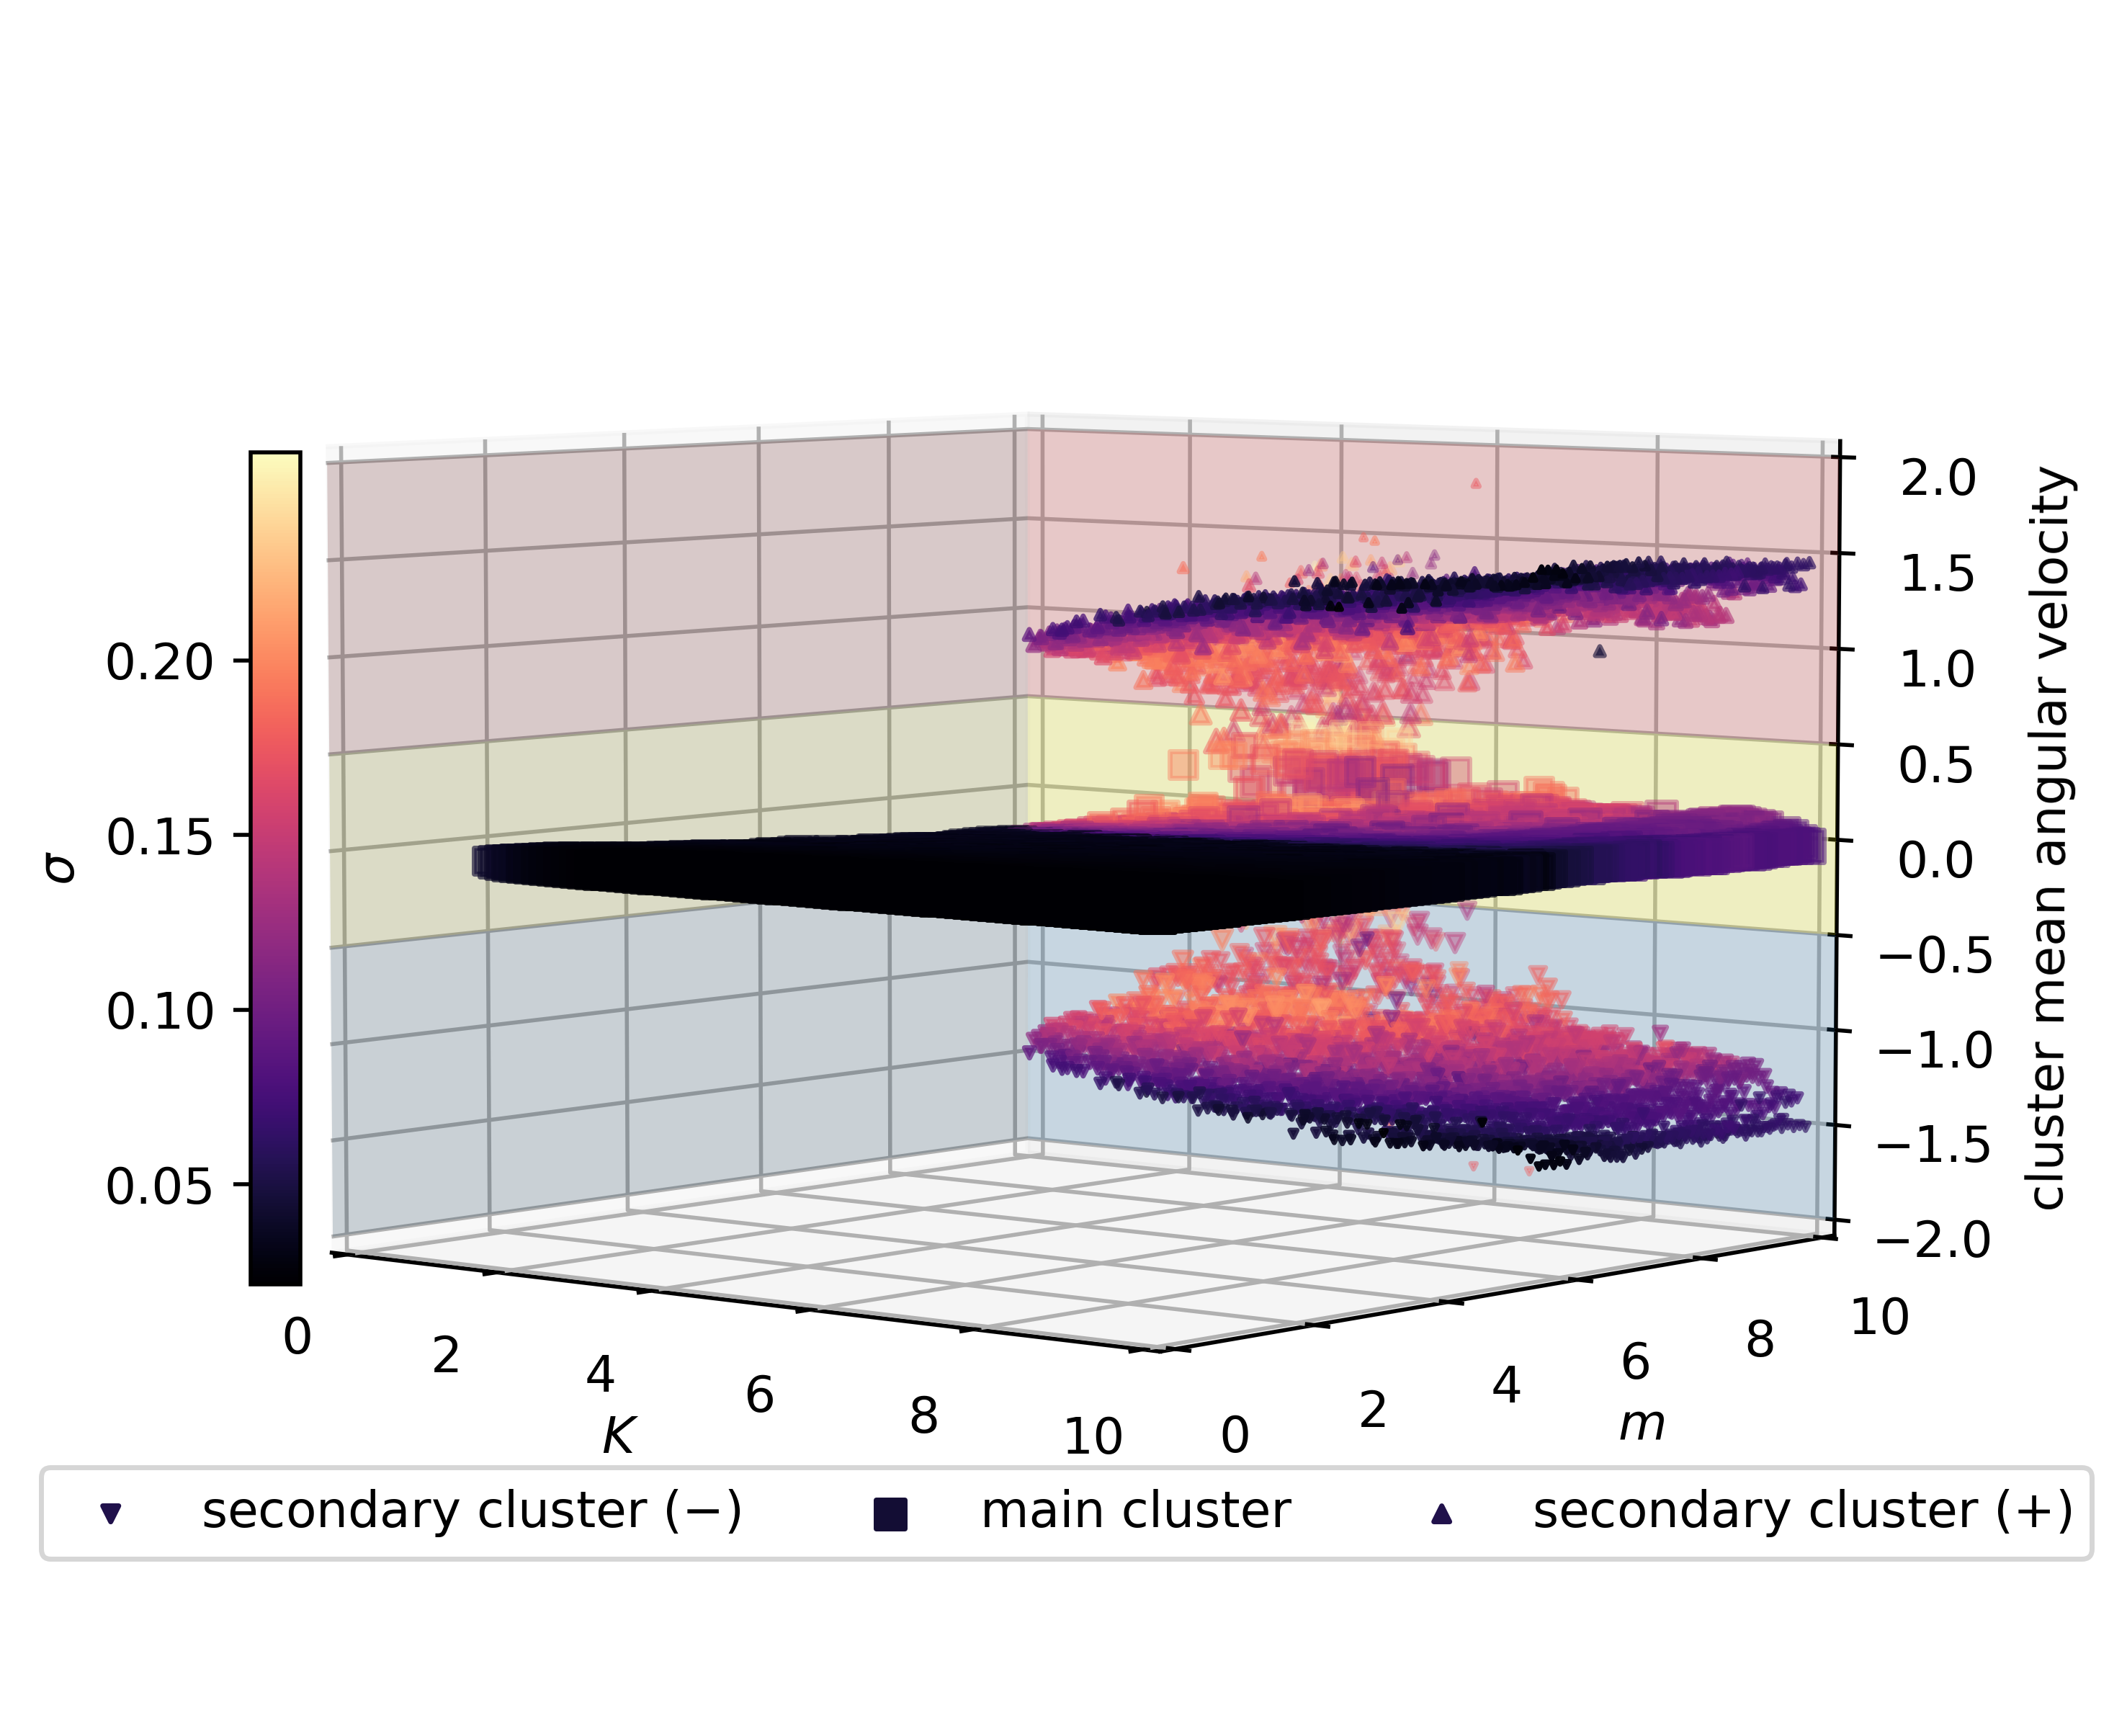

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

K = df['K']
m = df['m']
rstd = df[r'$r$\'s temporal std']
O = df['cluster mean phase velocity']
S = df['cluster size']
marker = df['type'].map({'main':'s','2nd cluster(-)':'v','2nd cluster(+)':'^'})

fig = plt.figure(figsize=(7,6),dpi=500)
ax = plt.subplot(projection='3d')
for marker,type_,label in zip(['v','s','^'],['2nd cluster(-)','main', '2nd cluster(+)'],[r'secondary cluster $(-)$','main cluster' , r'secondary cluster $(+)$']):
    df_temp = df.query(f'type == \'{type_}\'')
    K = df_temp['K']
    m = df_temp['m']
    rstd = df_temp[r'$r$\'s temporal std']
    O = df_temp['cluster mean phase velocity']
    S = df_temp['cluster size']
    sca = ax.scatter(K,m,O,s=S*0.1,c=rstd,cmap='magma',marker=marker,label =label)
# cax = ax.inset_axes([0.05, 0.8, 0.9, 0.03])
cax = ax.inset_axes([0.01, 0.25, 0.03, 0.5])
bar = fig.colorbar(sca, ax=ax, cax=cax,location='left')
# bar = plt.colorbar(sca,shrink=0.5,location='top')
bar.set_label(r'$\sigma$')
bar.set_ticks([0.05,0.1,0.15,0.20])

ca = ax.inset_axes([1.1, 0.25, 0.01, 0])
ca.axis('off')

# bar = plt.colorbar(sca,shrink=0.5,location='left')
# bar.set_label(r'$\sigma$')
# bar.set_ticks([0.05,0.1,0.15,0.2])
# ax.set_xlabel('$K$ : coupling constant')
# ax.set_ylabel('$m$ : inertia')

ax.set_xlabel(r'$K$')
ax.set_ylabel(r'$m$')
ax.yaxis._axinfo['label']['space_factor'] = 3.0
ax.set_zlabel('cluster mean angular velocity',)
# ax.text(11.5, 11.5, -1.65, 'cluster mean angular velocity', zdir='z',rotation=0)

# ax.set_zlabel()
# bar.set_label(r'$r$ temporal std.')
ax.view_init(elev=5., azim=-50, roll=0)
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.3))
ax.set_xlim([0,10])
ax.set_ylim([0,10])
# ax.set_zlim([-1.8,1.8])
ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_zmargin(0)

yy, zz = np.meshgrid([-0.2,10.2], [0.5,2.0])
xx = yy*0-0.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:red')

xx, zz = np.meshgrid([-0.2,10.2], [0.5,2.0])
yy = yy*0+10.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:red')



yy, zz = np.meshgrid([-0.2,10.2], [-0.5,0.5])
xx = yy*0-0.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='yellow')

xx, zz = np.meshgrid([-0.2,10.2], [-0.5,0.5])
yy = yy*0+10.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='yellow')
# ax.zaxis.labelpad=-0.5


yy, zz = np.meshgrid([-0.2,10.2], [-2.0,-0.5])
xx = yy*0-0.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:blue')

xx, zz = np.meshgrid([-0.2,10.2], [-2.0,-0.5])
yy = yy*0+10.2
ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:blue')

ax.legend(loc=8,ncols=3,bbox_to_anchor=(0.5, 0.07))
# fig.tight_layout()
# plt.savefig('total2.png',transparent=True,dpi=300,bbox_inches='tight')
# plt.show()


In [ ]:
Ks = 

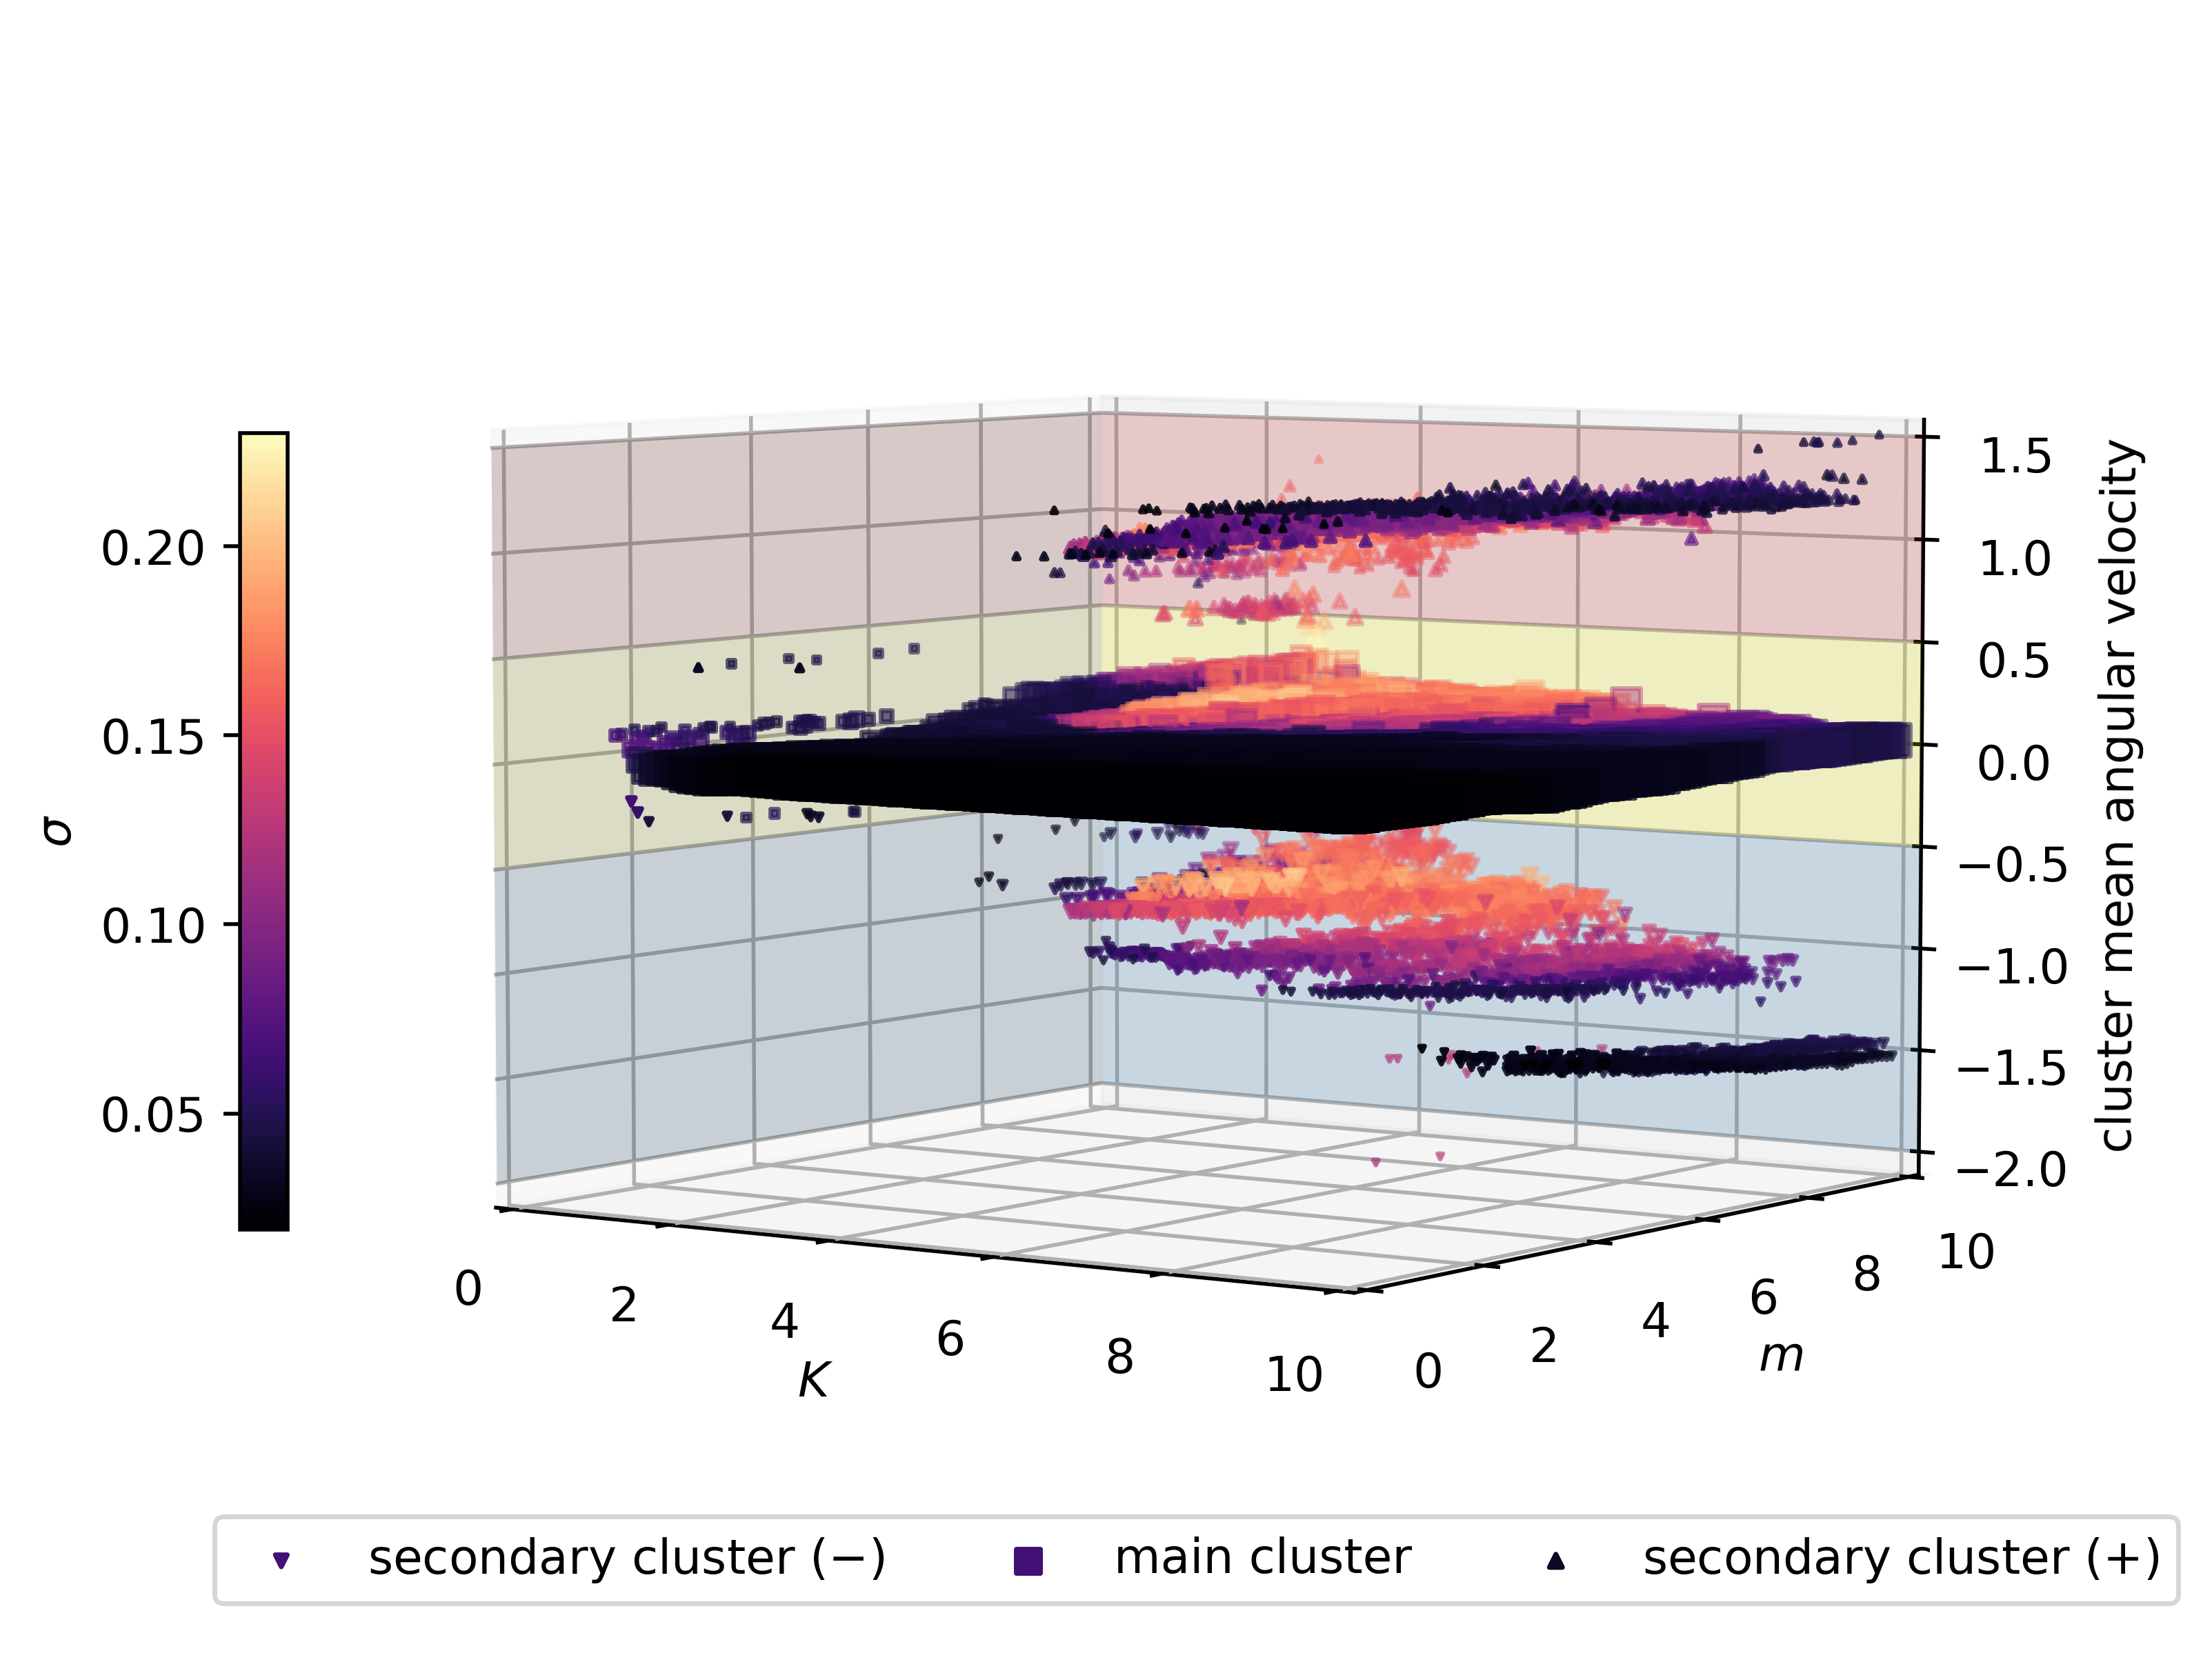

In [606]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

K = df['K']
m = df['m']
rstd = df[r'$r$\'s temporal std']
O = df['cluster mean phase velocity']
S = df['cluster size']
marker = df['type'].map({'main':'s','2nd cluster(-)':'v','2nd cluster(+)':'^'})

fig = plt.figure(figsize=(7,6),dpi=500)
ax = plt.subplot(projection='3d')
for marker,type_,label in zip(['v','s','^'],['2nd cluster(-)','main', '2nd cluster(+)'],[r'secondary cluster $(-)$','main cluster' , r'secondary cluster $(+)$']):
    df_temp = df.query(f'type == \'{type_}\'')
    K = df_temp['K']
    m = df_temp['m']
    rstd = df_temp[r'$r$\'s temporal std']
    O = df_temp['cluster mean phase velocity']
    S = df_temp['cluster size']
    sca = ax.scatter(K,m,O,s=S*0.1,c=rstd,cmap='magma',marker=marker,label =label)
# cax = ax.inset_axes([0.05, 0.8, 0.9, 0.03])
cax = ax.inset_axes([-0.1, 0.25, 0.03, 0.5])
bar = fig.colorbar(sca, ax=ax, cax=cax,location='left')
# bar = plt.colorbar(sca,shrink=0.5,location='top')
bar.set_label(r'$\sigma$')
bar.set_ticks([0.05,0.1,0.15,0.20])

ca = ax.inset_axes([0.1, 0.25, 0.01, 0])
ca.axis('off')

# bar = plt.colorbar(sca,shrink=0.5,location='left')
# bar.set_label(r'r(t) std.')
# bar.set_ticks([0.05,0.1,0.15,0.2])
# ax.set_xlabel('$K$ : coupling constant')
# ax.set_ylabel('$m$ : inertia')

ax.set_xlabel(r'$K$')
ax.set_ylabel(r'$m$')
ax.yaxis._axinfo['label']['space_factor'] = 3.0
ax.set_zlabel('cluster mean angular velocity',)
# ax.text(11.5, 11.5, -1.65, 'cluster mean angular velocity', zdir='z',rotation=0)

# ax.set_zlabel()
# bar.set_label(r'$r$ temporal std.')
# ax.view_init(elev=5., azim=-50, roll=0)
ax.view_init(elev=5., azim=-55,roll=0)
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.3))
ax.set_xlim([0,10])
ax.set_ylim([0,10])
# ax.set_zlim([-1.8,1.8])
ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_zmargin(0)

yy, zz = np.meshgrid([-0.2,10.2], [0.5,1.5])
xx = yy*0-0.2
Cpx_min =ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:red',zorder=-1)
Cpx_max =ax.plot_surface(xx+10.4, yy, zz,alpha=0.2,color ='tab:red',zorder=-1)

xx, zz = np.meshgrid([-0.2,10.2], [0.5,1.5])
yy = yy*0+10.2
Cpy_min =ax.plot_surface(xx, yy-10.4, zz,alpha=0.2,color ='tab:red',zorder=-1)
Cpy_max =ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:red',zorder=-1)



yy, zz = np.meshgrid([-0.2,10.2], [-0.5,0.5])
xx = yy*0-0.2
Cmainx_min =ax.plot_surface(xx, yy, zz,alpha=0.2,color ='yellow',zorder=-1)
Cmainx_max =ax.plot_surface(xx+10.4, yy, zz,alpha=0.2,color ='yellow',zorder=-1)

xx, zz = np.meshgrid([-0.2,10.2], [-0.5,0.5])
yy = yy*0+10.2
Cmainy_min=ax.plot_surface(xx, yy-10.4, zz,alpha=0.2,color ='yellow',zorder=-1)
Cmainy_max=ax.plot_surface(xx, yy, zz,alpha=0.2,color ='yellow',zorder=-1)
# ax.zaxis.labelpad=-0.5


yy, zz = np.meshgrid([-0.2,10.2], [-2.0,-0.5])
xx = yy*0-0.2
Cmx_min =ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:blue',zorder=-1)
Cmx_max =ax.plot_surface(xx+10.4, yy, zz,alpha=0.2,color ='tab:blue',zorder=-1)

xx, zz = np.meshgrid([-0.2,10.2], [-2.0,-0.5])
yy = yy*0+10.2
Cmy_min=ax.plot_surface(xx, yy-10.4, zz,alpha=0.2,color ='tab:blue',zorder=-1)
Cmy_max=ax.plot_surface(xx, yy, zz,alpha=0.2,color ='tab:blue',zorder=-1)

def set_alphas(xmin,xmax,ymin,ymax):
    Cmy_max.set_alpha(ymax)
    Cpy_max.set_alpha(ymax)
    Cmainy_max.set_alpha(ymax)
    
    Cmy_min.set_alpha(ymin)
    Cpy_min.set_alpha(ymin)
    Cmainy_min.set_alpha(ymin)
    
    Cmx_max.set_alpha(xmax)
    Cpx_max.set_alpha(xmax)
    Cmainx_max.set_alpha(xmax)

    Cmx_min.set_alpha(xmin)
    Cpx_min.set_alpha(xmin)
    Cmainx_min.set_alpha(xmin)
ax.legend(loc=8,ncols=3,bbox_to_anchor=(0.5, 0.00))
deg = ax.azim%360
if (deg>=0)&(deg<=90):
    kminkmax_mminmmax = (0.2,0,0.2,0)
    set_alphas(*kminkmax_mminmmax)
elif (deg>90)&(deg<=180):
    kminkmax_mminmmax = (0.,0.2,0.1,0)
    set_alphas(*kminkmax_mminmmax)
elif (deg>180)&(deg<270):
    kminkmax_mminmmax = (0.,0.2,0.,0.1)
    set_alphas(*kminkmax_mminmmax)
else:
    kminkmax_mminmmax = (0.2,0.,0.,0.2)
    set_alphas(*kminkmax_mminmmax)


# fig.tight_layout()
# plt.savefig('total2.png',transparent=True,dpi=300,bbox_inches='tight')
# plt.show()


In [60]:
ax.view_init(elev=5., azim=-10-360, roll=0)
ax.azim%360


350

In [37]:
ax.azim

0

In [30]:
Cmainx.set_alpha(0)

In [7]:
from matplotlib.animation import FuncAnimation 
from IPython.display import HTML

In [132]:
roll_array_  = np.linspace(-20,20,180) 
roll_array = np.r_[roll_array_,roll_array_[::-1]]
roll_array
def animate(i):
    ax.view_init(elev=5, azim=-50+i, roll=0)
    deg = ax.azim%360
    if (deg>=0)&(deg<=90):
        kminkmax_mminmmax = (0.2,0,0.2,0)
        set_alphas(*kminkmax_mminmmax)
    elif (deg>90)&(deg<=180):
        kminkmax_mminmmax = (0.,0.2,0.1,0)
        set_alphas(*kminkmax_mminmmax)
    elif (deg>180)&(deg<270):
        kminkmax_mminmmax = (0.,0.2,0.,0.1)
        set_alphas(*kminkmax_mminmmax)
    else:
        kminkmax_mminmmax = (0.2,0.,0.,0.2)
        set_alphas(*kminkmax_mminmmax)


In [135]:
%config InlineBackend.figure_format = 'retina'
idx = np.arange(0,360,1)
ani = FuncAnimation(fig,animate,frames=idx,interval=50)
ani.save('K-m space cluster mean angular velocity.mp4',dpi=400)
# HTML(ani.to_html5_video())

In [35]:
df_new['p_s_0'].describe()


NameError: name 'df_new' is not defined

In [ ]:
-1.107522,-0.144122

In [23]:
import seaborn as sns

In [613]:
df_data.K.unique().sort()

In [618]:
K_ = np.arange(1.2,10.01,0.1)

In [632]:
replace = {}
for i,K in enumerate(np.sort(df_data.K.unique())):
    replace[K] = float(f'{K_[i]:.01f}')
replace

{1.2: 1.2,
 1.3: 1.3,
 1.4000000000000001: 1.4,
 1.5000000000000002: 1.5,
 1.6000000000000003: 1.6,
 1.7000000000000004: 1.7,
 1.8000000000000005: 1.8,
 1.9000000000000006: 1.9,
 2.000000000000001: 2.0,
 2.1000000000000005: 2.1,
 2.200000000000001: 2.2,
 2.3000000000000007: 2.3,
 2.4000000000000012: 2.4,
 2.500000000000001: 2.5,
 2.6000000000000014: 2.6,
 2.700000000000001: 2.7,
 2.8000000000000016: 2.8,
 2.9000000000000012: 2.9,
 3.0000000000000018: 3.0,
 3.1000000000000014: 3.1,
 3.200000000000002: 3.2,
 3.3000000000000016: 3.3,
 3.400000000000002: 3.4,
 3.5000000000000018: 3.5,
 3.6000000000000023: 3.6,
 3.700000000000002: 3.7,
 3.8000000000000025: 3.8,
 3.900000000000002: 3.9,
 4.000000000000003: 4.0,
 4.100000000000002: 4.1,
 4.200000000000003: 4.2,
 4.3000000000000025: 4.3,
 4.400000000000003: 4.4,
 4.500000000000003: 4.5,
 4.600000000000003: 4.6,
 4.700000000000003: 4.7,
 4.800000000000003: 4.8,
 4.900000000000003: 4.9,
 5.0000000000000036: 5.0,
 5.100000000000003: 5.1,
 5.20000

In [633]:
df_data = df_data.replace({'K':replace})

(array([[15.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [20., 13.,  6.,  4.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [25., 25., 24., 20., 16., 15., 13., 14., 14., 14., 14., 16., 15.,
         17., 20., 17., 17., 20., 21., 28.],
        [20., 20., 20., 20., 20., 20., 20., 19., 20., 20., 20., 20., 20.,
         20., 20., 20., 19., 19., 19., 22.],
        [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 19., 20.,
         19., 20., 20., 18., 20., 20., 21.],
        [25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
         25., 25., 25., 25., 25., 25., 30.],
        [20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
         20., 20., 20., 20., 20., 20., 24.],
        [25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
         25., 25., 25., 25., 23., 24., 30.],
        [20., 20., 20., 20., 20., 20., 20., 20.,

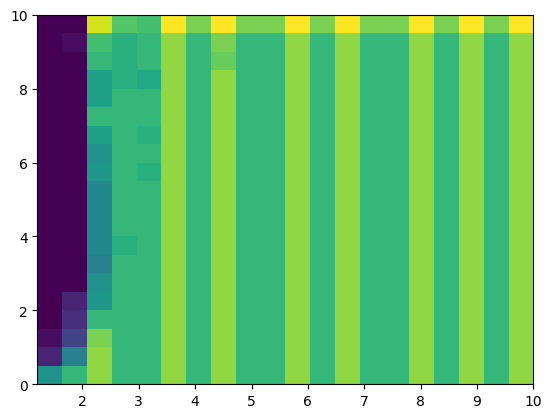

In [662]:
plt.hist2d(df_data.query('type == \'main\'')['K'],df_data.query('type == \'main\'')['m'],bins=20)

In [25]:
sns.histogram2d(df_data.query('type == \'main\''),x='K',y='m',)

AttributeError: module 'seaborn' has no attribute 'histogram2d'

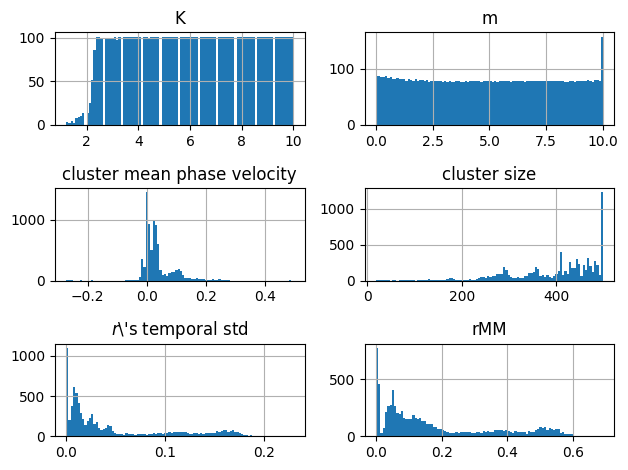

In [663]:
df_data.query('type == \'main\'').hist(bins=100)
plt.tight_layout()


In [677]:
test = df_new.reset_index()

In [ ]:
df_data['type'].value_counts()

main              7990
2nd cluster(-)    3834
2nd cluster(+)    2619
Name: type, dtype: int64

In [ ]:
def beta(gamma):
    if gamma>4: return 1
    elif (gamma>3)&(gamma<4):return 1/(gamma-3)
    elif (gamma>2)&(gamma<3):return 1+(gamma-2)/(1-(gamma-2)**2)
    else: return np.nan

In [ ]:
gammas = np.linspace(2,6,200)
betas = list(map(beta,gammas))

[]

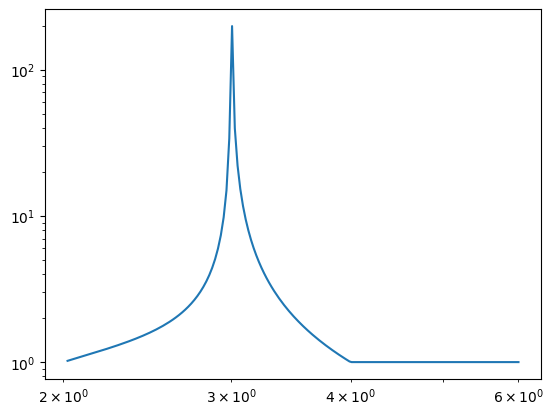

In [ ]:
plt.plot(gammas,betas)
plt.loglog()

In [640]:
df_new

r      rstd       rMM  error     c0    c1   c2  c3  c4  c5  \
K    m                                                                         
0.0  0.0   0.035934  0.019460  0.118610    NaN    NaN   NaN  NaN NaN NaN NaN   
     0.1   0.035906  0.019433  0.118610    NaN    NaN   NaN  NaN NaN NaN NaN   
     0.2   0.035881  0.019413  0.118610    NaN    NaN   NaN  NaN NaN NaN NaN   
     0.3   0.035859  0.019399  0.118610    NaN    NaN   NaN  NaN NaN NaN NaN   
     0.4   0.035841  0.019390  0.118610    NaN    NaN   NaN  NaN NaN NaN NaN   
...             ...       ...       ...    ...    ...   ...  ...  ..  ..  ..   
10.0 9.6   0.847727  0.027828  0.129691    NaN  435.0  19.0  NaN NaN NaN NaN   
     9.7   0.845084  0.030691  0.148702    NaN  434.0  19.0  6.0 NaN NaN NaN   
     9.8   0.845459  0.030125  0.131072    NaN  434.0  19.0  NaN NaN NaN NaN   
     9.9   0.841042  0.029996  0.134269    NaN  432.0  19.0  NaN NaN NaN NaN   
     10.0  0.841222  0.029398  0.126077    NaN  432.0  19.0  6.0 NaN NaN NaN   

           ...  m_s_0     m_o_0  p_s_0  p_o_0  m_s_1  m_o_1  m_s_2  m_o_2  \
K    m     ...                                                              
0.0  0.0   ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     0.1   ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     0.2   ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     0.3   ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     0.4   ...    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...        ...    ...       ...    ...    ...    ...    ...    ...    ...   
10.0 9.6   ...   19.0 -1.519050    NaN    NaN    NaN    NaN    NaN    NaN   
     9.7   ...   19.0 -1.516031    NaN    NaN    NaN    NaN    NaN    NaN   
     9.8   ...   19.0 -1.518684    NaN    NaN    NaN    NaN    NaN    NaN   
     9.9   ...   19.0 -1.524537    NaN    NaN    NaN    NaN    NaN    NaN   
     10.0  ...   19.0 -1.526074    NaN    NaN    NaN    NaN    NaN    NaN   

           p_s_1  p_o_1  
K    m                   
0.0  0.0     NaN    NaN  
     0.1     NaN    NaN  
     0.2     NaN    NaN  
     0.3     NaN    NaN  
     0.4     NaN    NaN  
...          ...    ...  
10.0 9.6     NaN    NaN  
     9.7     NaN    NaN  
     9.8     NaN    NaN  
     9.9     NaN    NaN  
     10.0    NaN    NaN  

[10201 rows x 46 columns]

In [ ]:

g = sns.jointplot(df_data.query('type == \'2nd cluster(+)\''), x="K", y="m",kind='reg',color='tab:red')
g.ax_joint.cla()
fig = plt.gcf()
fig.set_figwidth(6)
fig.set_figheight(4)
plt.sca(g.ax_joint)
CS=plt.pcolormesh(KK,MM,df_new['p_s_0'].unstack().to_numpy().T,zorder=2)
# cbar_ax = g.fig.add_axes([0.1,0.2,0.8,0.1])
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
cbar_ax = g.fig.add_axes([1, 0.1, .03, .65])
cb = plt.colorbar(cax=cbar_ax)
# plt.title('cluster size')
plt.suptitle('2nd cluster (+) size',y=0.94)
plt.tight_layout()
# plt.savefig('23 statphys poster/plus_size.png',dpi=300,transparent=True)
# plt.title('adsf')
# plt.colorbar(CS)

In [762]:
mc2K = df_new.m_s_0.dropna().reset_index().K.value_counts().sort_index()
mc2m = df_new.m_s_0.dropna().reset_index().m.value_counts().sort_index()
mc_K = mc2K.index.to_numpy(dtype=float)
mc_m = mc2m.index.to_numpy(dtype=float)


pc2K = df_new.p_s_0.dropna().reset_index().K.value_counts().sort_index()
pc2m = df_new.p_s_0.dropna().reset_index().m.value_counts().sort_index()
pc_K = pc2K.index.to_numpy(dtype=float)
pc_m = pc2m.index.to_numpy(dtype=float)


Text(0, 0.5, 'frequency')

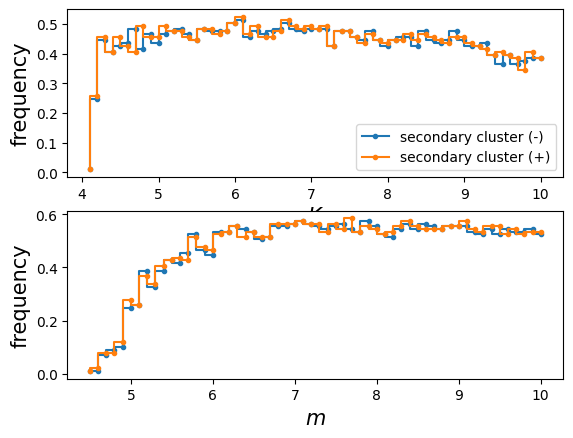

In [763]:
plt.subplot(211)
plt.step(mc_K,mc2K/101,'.-',label='secondary cluster (-)')
plt.step(pc_K,pc2K/101,'.-',label='secondary cluster (+)')
plt.legend()
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)


plt.subplot(212)
plt.step(mc_m,mc2m/101,'.-')
plt.step(pc_m,pc2m/101,'.-')
plt.xlabel(r'$m$',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)



<BarContainer object of 56 artists>

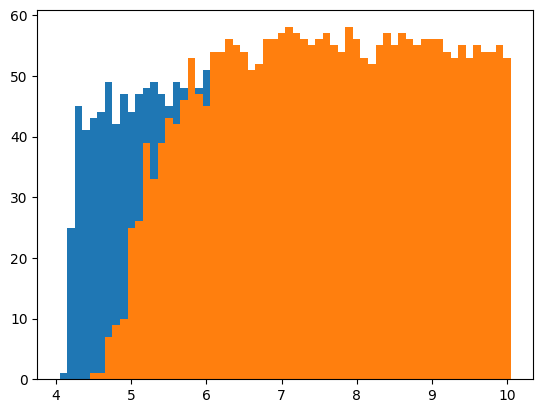

In [712]:
plt.bar(K_mc,mc2K,0.1)
plt.bar(m_mc,mc2m,0.1)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_17387/2144893644.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


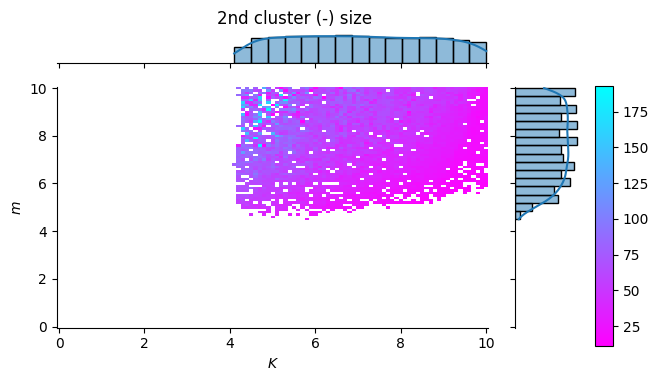

In [719]:

g = sns.jointplot(df_data.query('type == \'2nd cluster(-)\''), x="K", y="m",kind='reg',color='tab:blue')
g.ax_joint.cla()
fig = plt.gcf()
fig.set_figwidth(6)
fig.set_figheight(4)
plt.sca(g.ax_joint)
CS=plt.pcolormesh(KK,MM,df_new['m_s_0'].unstack().to_numpy().T,zorder=2,cmap='cool_r')
# cbar_ax = g.fig.add_axes([0.1,0.2,0.8,0.1])
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
cbar_ax = g.fig.add_axes([1, 0.1, .03, .65])
cb = plt.colorbar(cax=cbar_ax)
# plt.title('cluster size')
plt.suptitle('2nd cluster (-) size',y=0.94)
plt.tight_layout()
# plt.savefig('23 statphys poster/minus_size.png',dpi=300,transparent=True)
# plt.title('adsf')
# plt.colorbar(CS)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_17387/2691925090.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


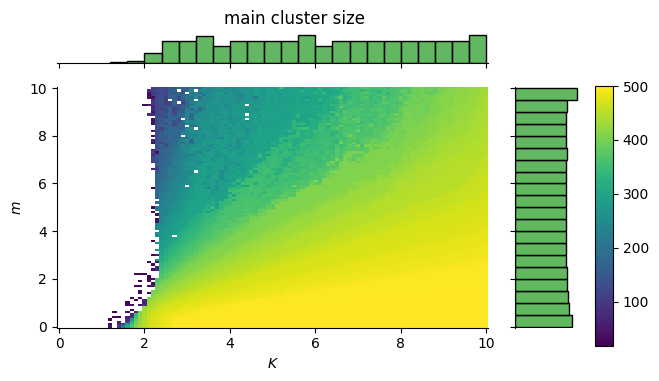

In [685]:

g = sns.jointplot(df_data.query('type == \'main\''), x="K", y="m",color='tab:green',alpha=0.8)
g.ax_joint.cla()
fig = plt.gcf()
fig.set_figwidth(6)
fig.set_figheight(4)
plt.sca(g.ax_joint)
CS=plt.pcolormesh(KK,MM,df_new['main_s'].unstack().to_numpy().T,zorder=2,cmap='viridis')
# cbar_ax = g.fig.add_axes([0.1,0.2,0.8,0.1])
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
cbar_ax = g.fig.add_axes([1, 0.1, .03, .65])
cb = plt.colorbar(cax=cbar_ax)
# plt.title('cluster size')
plt.suptitle('main cluster size',y=0.94)
plt.tight_layout()
# plt.savefig('23 statphys poster/temp.png',dpi=300,transparent=True)
# plt.title('adsf')
# plt.colorbar(CS)

In [ ]:
df_data

K     m  cluster mean phase velocity  cluster size            type  \
0       1.2   0.0                     0.163407          41.0            main   
1       1.4   0.0                     0.105102          98.0            main   
2       1.4   0.0                    -0.144122          27.0  2nd cluster(-)   
3       1.5   0.0                     0.055053         229.0            main   
4       1.6   0.0                     0.015495         314.0            main   
...     ...   ...                          ...           ...             ...   
15084   9.8  10.0                     1.508945          11.0  2nd cluster(+)   
15085   9.9  10.0                     0.025803         427.0            main   
15086   9.9  10.0                    -1.465150          25.0  2nd cluster(-)   
15087  10.0  10.0                     0.022897         432.0            main   
15088  10.0  10.0                    -1.526074          19.0  2nd cluster(-)   

       $r$\'s temporal std  
0                 0.050077  
1                 0.062979  
2                 0.062979  
3                 0.033474  
4                 0.024876  
...                    ...  
15084             0.042636  
15085             0.042307  
15086             0.042307  
15087             0.029398  
15088             0.029398  

[15089 rows x 6 columns]

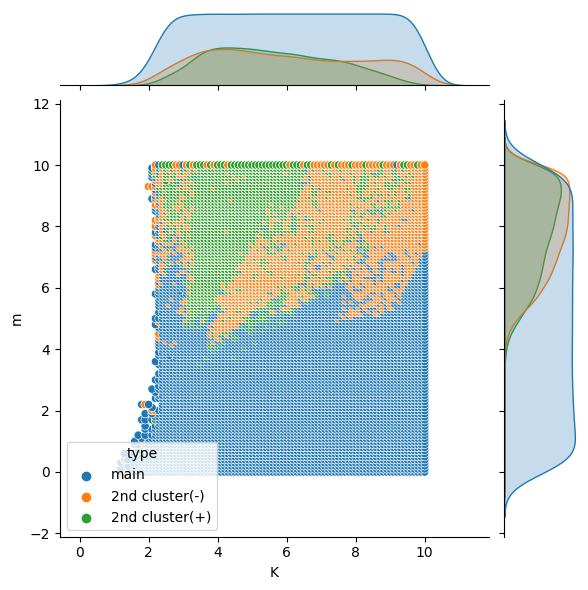

In [109]:
g = sns.jointplot(df_data, x="K", y="m",hue='type',sizes='cluster size')


In [ ]:
df_data.query('type == \'2nd cluster(-)\'')

K     m  cluster mean phase velocity  cluster size            type  \
2       1.4   0.0                    -0.144122          27.0  2nd cluster(-)   
91      1.4   0.1                    -0.199332          27.0  2nd cluster(-)   
267     1.6   0.3                    -0.164172          26.0  2nd cluster(-)   
353     1.3   0.4                    -0.255571          19.0  2nd cluster(-)   
356     1.6   0.4                    -0.208454          33.0  2nd cluster(-)   
...     ...   ...                          ...           ...             ...   
15079   9.6  10.0                    -1.553522          18.0  2nd cluster(-)   
15081   9.7  10.0                    -1.472186          26.0  2nd cluster(-)   
15083   9.8  10.0                    -1.472945          25.0  2nd cluster(-)   
15086   9.9  10.0                    -1.465150          25.0  2nd cluster(-)   
15088  10.0  10.0                    -1.526074          19.0  2nd cluster(-)   

       $r$\'s temporal std  
2                 0.062979  
91                0.054063  
267               0.050194  
353               0.038704  
356               0.044418  
...                    ...  
15079             0.039489  
15081             0.044789  
15083             0.042636  
15086             0.042307  
15088             0.029398  

[4273 rows x 6 columns]

In [112]:
temps = []
for m in ms:
    df_temp = df_TLO.query('r>0.05').reset_index().query(f'm=={m}')['K'].to_numpy(dtype=float)[0]
    temps.append(df_temp)

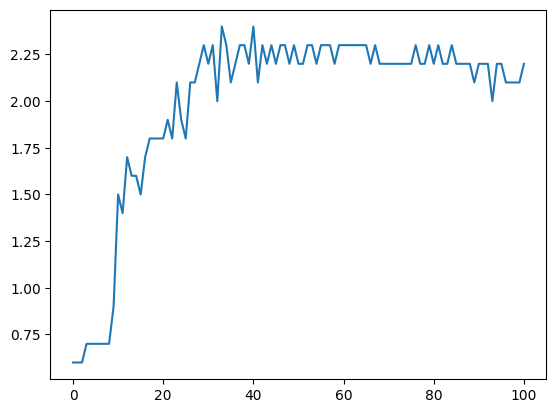

In [113]:
plt.plot(temps)

In [57]:
K_1mf = lambda m,s =1 : (2*s*(2/np.pi)**0.5)*(1+((2/np.pi)**0.5*(m*s))+(2/np.pi)*((m*s)**2)+((2/np.pi)**3-(2/np.pi))**0.5*((m*s)**3))
K_1mf = np.vectorize(K_1mf)

In [114]:
K_1_r = temps

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(1.5, 5.0)

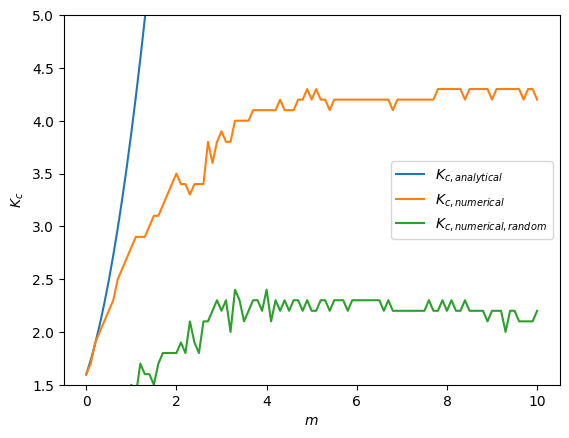

In [115]:
K_cm = K_1mf(ms)
plt.plot(ms,K_cm,label=r'$K_{c,analytical}$')
plt.plot(ms,K_1_q,label=r'$K_{c,numerical}$')
plt.plot(ms,K_1_r,label=r'$K_{c,numerical,random}$')
plt.legend()
plt.xlabel(r'$m$')
plt.ylabel(r'$K_c$')
plt.ylim(1.5,5)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


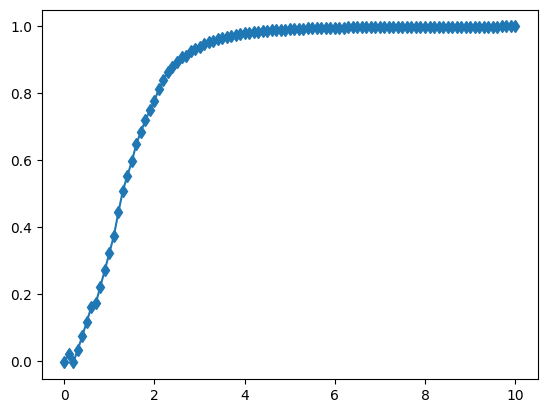

In [67]:
plt.plot(ms,(K_cm-temps)/K_cm,'d-')

In [153]:
# df_6 = df_data[df_data.m==6]
df_6 = df_data[df_data.m==6]

In [124]:
df_6

K    m  cluster mean phase velocity  cluster size  type  \
5474   2.3  6.0                     0.206207         180.0  main   
5475   2.4  6.0                     0.202683         190.0  main   
5476   2.5  6.0                     0.162755         217.0  main   
5477   2.6  6.0                     0.108341         232.0  main   
5478   2.7  6.0                     0.109225         235.0  main   
...    ...  ...                          ...           ...   ...   
5622   9.6  6.0                     0.013093         456.0  main   
5623   9.7  6.0                     0.015821         459.0  main   
5624   9.8  6.0                     0.018361         460.0  main   
5625   9.9  6.0                     0.015079         461.0  main   
5626  10.0  6.0                     0.012057         462.0  main   

      $r$\'s temporal std  
5474             0.030452  
5475             0.024500  
5476             0.030859  
5477             0.025083  
5478             0.027869  
...                   ...  
5622             0.015880  
5623             0.013367  
5624             0.014566  
5625             0.012439  
5626             0.011649  

[153 rows x 6 columns]

In [160]:
temp = df_6[df_6['type']=='2nd cluster(-)'].set_index('K')
tempp = df_6[df_6['type']=='2nd cluster(+)'].set_index('K')



In [178]:
df_66 = df.reset_index().query('m==6')

In [197]:
A = df_66['c1'].fillna(0).to_numpy(dtype=float)
B = df_66['c2'].fillna(0).to_numpy(dtype=float)
rstd = df_66['rstd'].fillna(0).to_numpy(dtype=float)

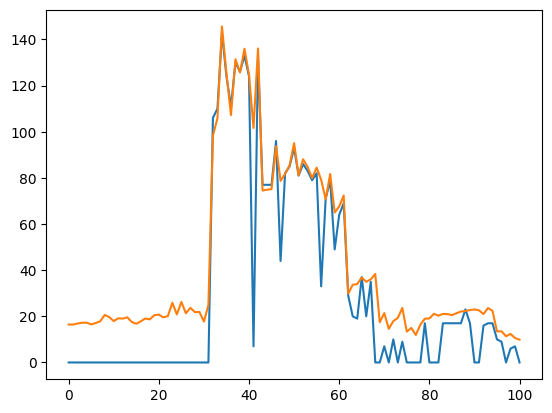

In [199]:
plt.plot(A+B)
plt.plot(rstd*850)

In [188]:
np.nansum(df_66['c1'].to_numpy(dtype=float),df_66['c2'].to_numpy(dtype=float))

TypeError: only integer scalar arrays can be converted to a scalar index

In [181]:
np.nanadd(df_66['c1']df_66['c2']

60      NaN
161     NaN
262     NaN
363     NaN
464     NaN
         ..
9756    NaN
9857    NaN
9958    NaN
10059   NaN
10160   NaN
Length: 101, dtype: float64

In [176]:
pd.merge(temp,tempp,how='outer')

m  cluster mean phase velocity  cluster size            type  \
0   6.0                    -0.815685          61.0  2nd cluster(-)   
1   6.0                    -0.810645          64.0  2nd cluster(-)   
2   6.0                    -0.751573          87.0  2nd cluster(-)   
3   6.0                    -0.779323          73.0  2nd cluster(-)   
4   6.0                    -0.821277          63.0  2nd cluster(-)   
..  ...                          ...           ...             ...   
70  6.0                     1.194967          20.0  2nd cluster(+)   
71  6.0                     1.200690          19.0  2nd cluster(+)   
72  6.0                     1.202351          20.0  2nd cluster(+)   
73  6.0                     1.196823          20.0  2nd cluster(+)   
74  6.0                     1.190579          20.0  2nd cluster(+)   

    $r$\'s temporal std       rMM  
0              0.115713  0.392312  
1              0.124469  0.412119  
2              0.171325  0.532916  
3              0.147429  0.479246  
4              0.126146  0.421015  
..                  ...       ...  
70             0.039604  0.162946  
71             0.039997  0.162696  
72             0.043312  0.171378  
73             0.041149  0.167691  
74             0.042390  0.167212  

[75 rows x 6 columns]

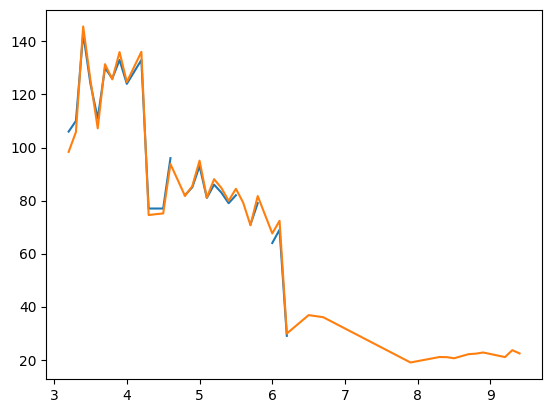

In [185]:
plt.plot(temp['cluster size']+tempp['cluster size'])
plt.plot(850*temp[r'$r$\'s temporal std'])
# plt.plot(160*temp[r'rMM'])

In [544]:
df_temp = df_new.reset_index().set_index('K')

In [585]:
m = 0.1
df_66 = df_temp.query(f'm=={m}')

In [586]:
A = df_66['p_s_0'].fillna(0).to_numpy(dtype=float)
B = df_66['m_s_0'].fillna(0).to_numpy(dtype=float)
R = df_66['r'].fillna(0).to_numpy(dtype=float)
O = df_66['main_s'].fillna(0).to_numpy(dtype=float)
Os = df_66['main_o'].fillna(0).to_numpy(dtype=float)
As = df_66['p_o_0'].fillna(0).to_numpy(dtype=float)
Bs = df_66['m_o_0'].fillna(0).to_numpy(dtype=float)
A1 = df_66['p_s_1'].fillna(0).to_numpy(dtype=float)
B1 = df_66['m_s_1'].fillna(0).to_numpy(dtype=float)
rstd = df_66['rstd'].fillna(0).to_numpy(dtype=float)

Text(0.5, 1.0, '$m$=0.1')

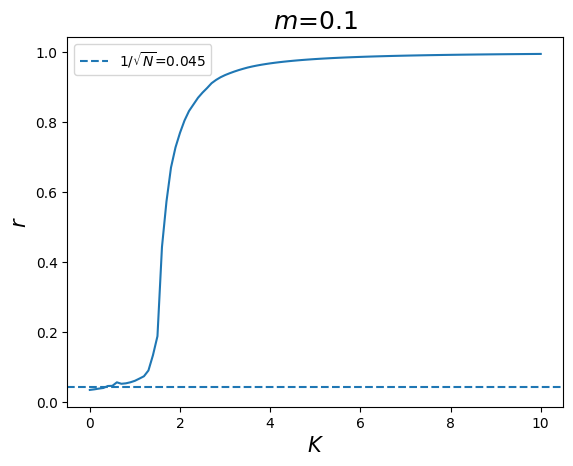

In [587]:
plt.plot(df_66.index,R)
plt.axhline(1/N**0.5, label = rf'$1/\sqrt{{N}}$={1/N**0.5:.3f}',ls='--')
plt.legend()
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$r$',fontsize=15)
plt.title(rf'$m$={m}',fontsize=18)


In [548]:
C = np.nansum(np.stack([A,B]),0)

(0.0, 200.0)

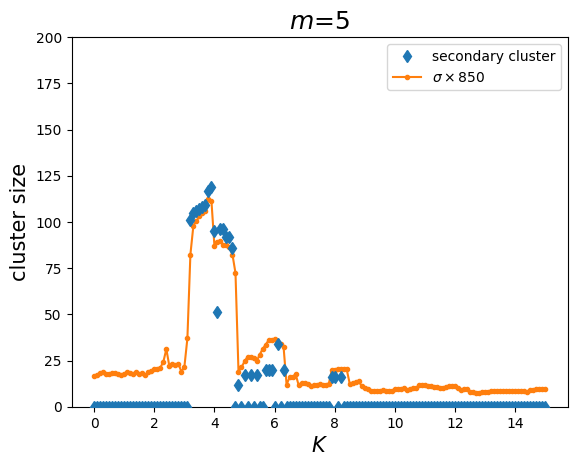

In [533]:
plt.plot(df_66.index,A+B,'d',label='secondary cluster',zorder=3)
# plt.plot(df_66.index,A+B+A1+B1,'d')
plt.plot(df_66.index,rstd*850,'.-',label=r'$\sigma\times{850}$')
plt.legend()
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'cluster size',fontsize=15)
plt.title(rf'$m$={m}',fontsize=18)
plt.ylim(0,200)

In [534]:
1.6*500

800.0

In [535]:
N = 500

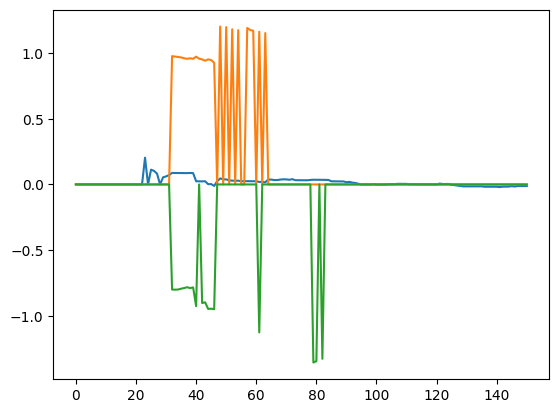

In [536]:
plt.plot(Os)
plt.plot(As)
plt.plot(Bs)

(0.0, 0.5)

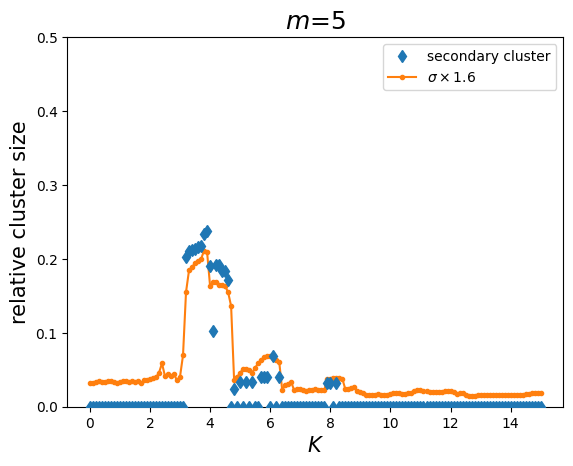

In [537]:
plt.plot(df_66.index,(B+A)/N,'d',label='secondary cluster',zorder=3)
# plt.plot(df_66.index,(A+B+A1+B1)/N,'d')
plt.plot(df_66.index,rstd*1.6,'.-',label=r'$\sigma\times{1.6}$')
plt.legend()
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'relative cluster size',fontsize=15)
plt.title(rf'$m$={m}',fontsize=18)
plt.ylim(0,0.5)